# **Data Cleaning**

## **Handle missing values & duplicates**

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd

file_path = '/content/drive/MyDrive/nolan_edutech_assignement/SamsungS24_Flipkart_R177_D241125_KrishnSingh_fetched.csv'
df = pd.read_csv(file_path)
display(df.tail(20))

,Page,Review_ID,Author_Name,Rating_Stars,Review_Title,Review_Text,City,Posted_Date,Helpful_Count,Certified_Buyer
2955,170,P170_REV_015,Vineet Anand,1.0,Useless product,Worst experienceREAD MORE,Bengaluru,1 month ago,2,Yes
2956,170,P170_REV_016,Saurabh Singh,5.0,Wonderful,Best phone in samsungREAD MORE,Garhwal Division,1 month ago,0,Yes
2957,170,P170_REV_017,Anonymous,NaN,NaN,NaN,NaN,NaN,0,No
2958,82,P82_REV_001,Anonymous,4.0,NaN,NaN,NaN,NaN,0,No
2959,82,P82_REV_002,Anonymous,NaN,NaN,NaN,NaN,NaN,0,No
2960,82,P82_REV_003,Anonymous,NaN,NaN,NaN,NaN,NaN,0,No
2961,82,P82_REV_004,Anonymous,NaN,NaN,NaN,NaN,NaN,0,No
2962,82,P82_REV_005,Anonymous,NaN,NaN,NaN,NaN,NaN,0,No
2963,82,P82_REV_006,Anonymous,NaN,NaN,NaN,NaN,NaN,0,No
2964,82,P82_REV_007,Mandeep Singh,5.0,Fabulous!,Very elegant looks. Smooth OSBattery life is very good.I use my phone quite often and still it can cover the entire day on full charge.READ MORE,Patiala,29 days ago,0,Yes


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Page             2975 non-null   int64  
 1   Review_ID        2975 non-null   object 
 2   Author_Name      2975 non-null   object 
 3   Rating_Stars     1925 non-null   float64
 4   Review_Title     1750 non-null   object 
 5   Review_Text      1750 non-null   object 
 6   City             1742 non-null   object 
 7   Posted_Date      1750 non-null   object 
 8   Helpful_Count    2975 non-null   int64  
 9   Certified_Buyer  2975 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 232.6+ KB


In [37]:
df.isna().sum()

,0
Page,0
Review_ID,0
Author_Name,0
Rating_Stars,1050
Review_Title,1225
Review_Text,1225
City,1233
Posted_Date,1225
Helpful_Count,0
Certified_Buyer,0


In [38]:
df.shape


(2975, 10)

In [39]:
# total vs misiing data % table
import pandas as pd

total_rows = len(df)
missing_counts = df.isna().sum()
missing_percent = (missing_counts / total_rows * 100).round(2)

missing_table = pd.DataFrame({
    "column": df.columns,
    "missing_count": missing_counts,
    "missing_percent": missing_percent
})

print("total rows:", total_rows)
missing_table


total rows: 2975


,column,missing_count,missing_percent
Page,Page,0,0.00
Review_ID,Review_ID,0,0.00
Author_Name,Author_Name,0,0.00
Rating_Stars,Rating_Stars,1050,35.29
Review_Title,Review_Title,1225,41.18
Review_Text,Review_Text,1225,41.18
City,City,1233,41.45
Posted_Date,Posted_Date,1225,41.18
Helpful_Count,Helpful_Count,0,0.00
Certified_Buyer,Certified_Buyer,0,0.00


**acc to the above table we have a 41% of missing data or dummy fetch due to the scrapping, in every page 1st 4 to 5 entries are dummy/null so removing them**

In [40]:
# drop rows where 'Review_Text' is null
df.dropna(subset=['Review_Text'], inplace=True)

# display the new shape of the DataFrame
print("New DataFrame shape:", df.shape)

New DataFrame shape: (1750, 10)


In [41]:
# sort the dataframe by 'page' in ascending order
df.sort_values(by='Page', ascending=True, inplace=True)

# display the first 10 rows of the sorted dataframe
display(df.head(20))

,Page,Review_ID,Author_Name,Rating_Stars,Review_Title,Review_Text,City,Posted_Date,Helpful_Count,Certified_Buyer
2811,1,P1_REV_007,Swayam Vish,4.0,Pretty good,Good compact phone and having good camera but facing issu in battery because it's 4000 mah and it's not lasting for whole day. I have to carry power bank.I am sharing sample of photos.. it's light balance is very good.READ MORE,Sehore District,1 month ago,37,Yes
2814,1,P1_REV_010,Amit Kumar Behera,5.0,Mind-blowing purchase,"Powerful performance, excellent display,compact size and amazing camera making it an allrounder phone. The only drawback is battery life.READ MORE",Bhubaneswar,1 month ago,34,Yes
2813,1,P1_REV_009,Arnab Deb,5.0,Awesome,Today received this phone. It's just outstanding. Battery is good. I m not facing any kind of Heating issue. Camera is far better than I phone. Just shared a photo of my friend in low light.READ MORE,Dinhata,1 month ago,10,Yes
2812,1,P1_REV_008,Jayasuriya Anbu,4.0,Good quality product,"After using S24 for 4 days am writing this review overall a good compact and a handy phone if you want a beast camera, clean UI, battery backup is slightly less but it's okay for average use if you want a mobile for daily gaming than the battery backup will be lesser.If you want good handy Samsung phone than go for it🙌READ MORE",Mumbai,1 month ago,127,Yes
2817,1,P1_REV_013,Abhishek Maurya,5.0,Wonderful,Everything is just excellent but only battery is averageREAD MORE,Jaunpur,1 month ago,8,Yes
2818,1,P1_REV_014,Mayank Shukla,5.0,Best in the market!,I got the phone today the behaviour of delivery agent was awesome... for now i can only say good compact phone with awesome camera and processor a bit dissapointed with the battery and heating issue.... will share more info after some months of useREAD MORE,Raipur,2 months ago,28,Yes
2820,1,P1_REV_016,Niranjan G,5.0,Worth every penny,Hi All. I am writing this review based on my 1 week usage. I bought it in the BBD Sale only. First of all I upgraded from S22 (Base) which i used for more than 1 year but the main problem was battery issue and heating. Did the upgrade was good I will tell you that it was great. I will also compare s24 with previous s22+ Pros* Camera is Great nothing particularly to tell about it. Because even i upgrade from S22 for last several years the camera software is same for samsung.* Processor I...READ MORE,Chalakudy,28 days ago,8,Yes
2816,1,P1_REV_012,Pawan Rajput,5.0,Wonderful,"Excellent product and worth it to buy , if there is an option to choose iphone15or16 and s24 then i would go with s24READ MORE",Etah,1 month ago,9,Yes
2815,1,P1_REV_011,Raja,5.0,Brilliant,Just looking like a wowREAD MORE,Dhenkanal District,1 month ago,64,Yes
2819,1,P1_REV_015,Kiran Patil,5.0,Simply awesome,"Camera qulity and build qulity , sound qulity of this phon is oustanding. But normal hitting isshue experiance in this phoneREAD MORE",Palghar,1 month ago,48,Yes


In [42]:
display(df[['Review_Text', 'Review_Title']].head())

,Review_Text,Review_Title
2811,Good compact phone and having good camera but facing issu in battery because it's 4000 mah and it's not lasting for whole day. I have to carry power bank.I am sharing sample of photos.. it's light balance is very good.READ MORE,Pretty good
2814,"Powerful performance, excellent display,compact size and amazing camera making it an allrounder phone. The only drawback is battery life.READ MORE",Mind-blowing purchase
2813,Today received this phone. It's just outstanding. Battery is good. I m not facing any kind of Heating issue. Camera is far better than I phone. Just shared a photo of my friend in low light.READ MORE,Awesome
2812,"After using S24 for 4 days am writing this review overall a good compact and a handy phone if you want a beast camera, clean UI, battery backup is slightly less but it's okay for average use if you want a mobile for daily gaming than the battery backup will be lesser.If you want good handy Samsung phone than go for it🙌READ MORE",Good quality product
2817,Everything is just excellent but only battery is averageREAD MORE,Wonderful


In [43]:
# reset the index of the DataFrame after dropping rows
df.reset_index(drop=True, inplace=True)

# display the first few rows with the new index
display(df.head())

,Page,Review_ID,Author_Name,Rating_Stars,Review_Title,Review_Text,City,Posted_Date,Helpful_Count,Certified_Buyer
0,1,P1_REV_007,Swayam Vish,4.0,Pretty good,Good compact phone and having good camera but facing issu in battery because it's 4000 mah and it's not lasting for whole day. I have to carry power bank.I am sharing sample of photos.. it's light balance is very good.READ MORE,Sehore District,1 month ago,37,Yes
1,1,P1_REV_010,Amit Kumar Behera,5.0,Mind-blowing purchase,"Powerful performance, excellent display,compact size and amazing camera making it an allrounder phone. The only drawback is battery life.READ MORE",Bhubaneswar,1 month ago,34,Yes
2,1,P1_REV_009,Arnab Deb,5.0,Awesome,Today received this phone. It's just outstanding. Battery is good. I m not facing any kind of Heating issue. Camera is far better than I phone. Just shared a photo of my friend in low light.READ MORE,Dinhata,1 month ago,10,Yes
3,1,P1_REV_008,Jayasuriya Anbu,4.0,Good quality product,"After using S24 for 4 days am writing this review overall a good compact and a handy phone if you want a beast camera, clean UI, battery backup is slightly less but it's okay for average use if you want a mobile for daily gaming than the battery backup will be lesser.If you want good handy Samsung phone than go for it🙌READ MORE",Mumbai,1 month ago,127,Yes
4,1,P1_REV_013,Abhishek Maurya,5.0,Wonderful,Everything is just excellent but only battery is averageREAD MORE,Jaunpur,1 month ago,8,Yes


In [44]:
df.shape

(1750, 10)

In [45]:
df.isna().sum()

,0
Page,0
Review_ID,0
Author_Name,0
Rating_Stars,0
Review_Title,0
Review_Text,0
City,8
Posted_Date,0
Helpful_Count,0
Certified_Buyer,0


### **Standardization**

In [46]:
from datetime import datetime, timedelta
import re
import pandas as pd

# function to convert "1 month ago", "5 days ago" → actual date
def convert_relative_date(text):
    if pd.isna(text):
        return None

    text = text.lower()
    now = datetime.now()

    # extract number - check if match exists before calling .group()
    match = re.search(r'\d+', text)
    if not match:
        return None # No digits found, return None

    num = int(match.group())

    if "day" in text:
        return now - timedelta(days=num)
    if "month" in text:
        return now - timedelta(days=num*30)
    if "year" in text:
        return now - timedelta(days=num*365)
    if "hour" in text:
        return now - timedelta(hours=num)

    return None

# 1. Standardize 'Posted_Date' to a datetime object in 'Converted_Date' column
df['Converted_Date'] = df['Posted_Date'].apply(convert_relative_date)

# 2. Fill any remaining nulls in 'City' with 'unknown'
df['City'] = df['City'].fillna('unknown')

# 3. Ensure 'Rating_Stars' is numeric
df['Rating_Stars'] = pd.to_numeric(df['Rating_Stars'], errors='coerce')

# Drop the redundant 'Standardized_Posted_Date' column if it exists
if 'Standardized_Posted_Date' in df.columns:
    df.drop(columns=['Standardized_Posted_Date'], inplace=True)

print("Data types after standardization:")
display(df.info())

print("Missing values after standardization:")
display(df.isna().sum())

Data types after standardization:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Page             1750 non-null   int64         
 1   Review_ID        1750 non-null   object        
 2   Author_Name      1750 non-null   object        
 3   Rating_Stars     1750 non-null   float64       
 4   Review_Title     1750 non-null   object        
 5   Review_Text      1750 non-null   object        
 6   City             1750 non-null   object        
 7   Posted_Date      1750 non-null   object        
 8   Helpful_Count    1750 non-null   int64         
 9   Certified_Buyer  1750 non-null   object        
 10  Converted_Date   1739 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 150.5+ KB


None

Missing values after standardization:


,0
Page,0
Review_ID,0
Author_Name,0
Rating_Stars,0
Review_Title,0
Review_Text,0
City,0
Posted_Date,0
Helpful_Count,0
Certified_Buyer,0


In [47]:
df.sample(20)

,Page,Review_ID,Author_Name,Rating_Stars,Review_Title,Review_Text,City,Posted_Date,Helpful_Count,Certified_Buyer,Converted_Date
708,72,P72_REV_015,Paresh MAiyad,5.0,Fabulous!,GoodREAD MORE,Dhoraji,26 days ago,0,Yes,2025-10-31 04:23:44.264189
1715,173,P173_REV_014,Sayantan Saha,4.0,Wonderful,NiceREAD MORE,Naihati,1 month ago,0,Yes,2025-10-27 04:23:44.266124
720,74,P74_REV_009,Kousik Halder,4.0,Brilliant,Software Experience is Amazing. Also it has Decent Camera with Superb Dynamic Range.You are going to be in love with Samsung Ecosystem.READ MORE,Kolkata,26 days ago,0,Yes,2025-10-31 04:23:44.264216
337,35,P35_REV_014,Devender Sharma,3.0,Decent product,Overall okay. It's a compact phone with a small screen. Software experience is very good. But it will really disappoint you if you are looking for a good camera. It's not a flagship camera phone.. Not good for Indoor and night photography.READ MORE,Shimla,1 month ago,4,Yes,2025-10-27 04:23:44.263524
1328,134,P134_REV_008,Roshan Yadav,5.0,Just wow!,Good productREAD MORE,Shahpura Jaipur District,1 month ago,0,Yes,2025-10-27 04:23:44.265415
693,71,P71_REV_009,Ramesh Bhandary,5.0,Brilliant,Perfect phone!..... 💯 Battery is also good..Camera is just dslr..Performance is on next level with sd 8 gen 3..Display is great..And the best thing in this phone is its ui is great ..Totally a chef's kiss 😘READ MORE,Rangapara,25 days ago,0,Yes,2025-11-01 04:23:44.264163
820,84,P84_REV_008,sai d,5.0,Simply awesome,The best deal for this price.READ MORE,Bangalore Division,29 days ago,0,Yes,2025-10-28 04:23:44.264439
986,100,P100_REV_016,Flipkart Customer,4.0,Worth the money,Very nice phone..READ MORE,Duliajan No 1,1 month ago,0,Yes,2025-10-27 04:23:44.264750
484,50,P50_REV_016,Flipkart Customer,5.0,Awesome,Best QualityREAD MORE,Mewat District,12 days ago,0,Yes,2025-11-14 04:23:44.263789
998,101,P101_REV_008,Sibu 7,5.0,Terrific,ExllentREAD MORE,Surat,1 month ago,0,Yes,2025-10-27 04:23:44.264771


### **Sentiment Label Creation**

In [48]:
import numpy as np

# Define conditions for sentiment classification
conditions = [
    df['Rating_Stars'] >= 4, # Positive reviews
    df['Rating_Stars'] == 3, # Neutral reviews
    df['Rating_Stars'] <= 2  # Negative reviews
]

# Define values to assign for each condition, according to the new mapping:
# 2 for positive sentiment (Rating_Stars >= 4)
# 1 for neutral sentiment (Rating_Stars == 3)
# 0 for negative sentiment (Rating_Stars <= 2)
values = [2, 1, 0]

# Create the new 'Sentiment' column using numpy.select
df['Sentiment'] = np.select(conditions, values, default=np.nan)

print("New 'Sentiment' column created. Displaying head and value counts:")
display(df[['Rating_Stars', 'Sentiment']].head(10))
display(df['Sentiment'].value_counts(dropna=False))

New 'Sentiment' column created. Displaying head and value counts:


,Rating_Stars,Sentiment
0,4.0,2.0
1,5.0,2.0
2,5.0,2.0
3,4.0,2.0
4,5.0,2.0
5,5.0,2.0
6,5.0,2.0
7,5.0,2.0
8,5.0,2.0
9,5.0,2.0


,count
Sentiment,
2.0,1499
0.0,148
1.0,103


### **Normalize text** ;- stopwords, lemmatization, spelling correction, noise removal


In [49]:
!pip install autocorrect

In [50]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Display the DataFrame with the new options
display(df.head())

,Page,Review_ID,Author_Name,Rating_Stars,Review_Title,Review_Text,City,Posted_Date,Helpful_Count,Certified_Buyer,Converted_Date,Sentiment
0,1,P1_REV_007,Swayam Vish,4.0,Pretty good,Good compact phone and having good camera but facing issu in battery because it's 4000 mah and it's not lasting for whole day. I have to carry power bank.I am sharing sample of photos.. it's light balance is very good.READ MORE,Sehore District,1 month ago,37,Yes,2025-10-27 04:23:44.262805,2.0
1,1,P1_REV_010,Amit Kumar Behera,5.0,Mind-blowing purchase,"Powerful performance, excellent display,compact size and amazing camera making it an allrounder phone. The only drawback is battery life.READ MORE",Bhubaneswar,1 month ago,34,Yes,2025-10-27 04:23:44.262826,2.0
2,1,P1_REV_009,Arnab Deb,5.0,Awesome,Today received this phone. It's just outstanding. Battery is good. I m not facing any kind of Heating issue. Camera is far better than I phone. Just shared a photo of my friend in low light.READ MORE,Dinhata,1 month ago,10,Yes,2025-10-27 04:23:44.262831,2.0
3,1,P1_REV_008,Jayasuriya Anbu,4.0,Good quality product,"After using S24 for 4 days am writing this review overall a good compact and a handy phone if you want a beast camera, clean UI, battery backup is slightly less but it's okay for average use if you want a mobile for daily gaming than the battery backup will be lesser.If you want good handy Samsung phone than go for it🙌READ MORE",Mumbai,1 month ago,127,Yes,2025-10-27 04:23:44.262834,2.0
4,1,P1_REV_013,Abhishek Maurya,5.0,Wonderful,Everything is just excellent but only battery is averageREAD MORE,Jaunpur,1 month ago,8,Yes,2025-10-27 04:23:44.262836,2.0


In [51]:
import re

# Function to remove 'read more', 'READMORE', and the standalone word 'read' (case-insensitive)
def remove_read_more(text):
    if isinstance(text, str):
        # Use re.IGNORECASE for case-insensitive replacement.
        # \bread\b targets the standalone word 'read' to avoid removing 'read' from words like 'already'.
        return re.sub(r'read more|\bread\b', '', text, flags=re.IGNORECASE).strip()
    return text

# Apply the function to 'Review_Text' and 'Review_Title' columns
df['Review_Text'] = df['Review_Text'].apply(remove_read_more)
df['Review_Title'] = df['Review_Title'].apply(remove_read_more)

# Display the first few rows to show the changes
print("DataFrame after removing 'read more' and 'read' from Review_Text and Review_Title:")
display(df[['Review_Title', 'Review_Text']].head())

DataFrame after removing 'read more' and 'read' from Review_Text and Review_Title:


,Review_Title,Review_Text
0,Pretty good,Good compact phone and having good camera but facing issu in battery because it's 4000 mah and it's not lasting for whole day. I have to carry power bank.I am sharing sample of photos.. it's light balance is very good.
1,Mind-blowing purchase,"Powerful performance, excellent display,compact size and amazing camera making it an allrounder phone. The only drawback is battery life."
2,Awesome,Today received this phone. It's just outstanding. Battery is good. I m not facing any kind of Heating issue. Camera is far better than I phone. Just shared a photo of my friend in low light.
3,Good quality product,"After using S24 for 4 days am writing this review overall a good compact and a handy phone if you want a beast camera, clean UI, battery backup is slightly less but it's okay for average use if you want a mobile for daily gaming than the battery backup will be lesser.If you want good handy Samsung phone than go for it🙌"
4,Wonderful,Everything is just excellent but only battery is average


In [52]:
from autocorrect import Speller
from collections import Counter
import pandas as pd

speller = Speller(lang='en')

def find_misspelled_words(text):
    if not isinstance(text, str):
        return []

    words = text.lower().split()
    misspelled = []

    for w in words:
        corrected = speller(w)
        if corrected != w:  # means spellchecker thinks it's wrong
            misspelled.append(w)

    return misspelled

# ---- Run on your columns ----

df['Misspelled_Title_Words'] = df['Review_Title'].apply(find_misspelled_words)
df['Misspelled_Text_Words'] = df['Review_Text'].apply(find_misspelled_words)

# Combine all misspelled words
all_misspelled = df['Misspelled_Title_Words'].sum() + df['Misspelled_Text_Words'].sum()

# Count top frequent misspellings
misspelled_freq = Counter(all_misspelled)

print("Total Misspelled Word Count:", len(all_misspelled))
print("\nTop 30 Misspelled Words:")
print(misspelled_freq.most_common(30))


Total Misspelled Word Count: 423

Top 30 Misspelled Words:
[('exynos', 5), ('iphones', 5), ('bgmi', 5), ('compect', 5), ('perfomance', 5), ('bettry', 4), ('qulity', 3), ('verry', 3), ('buttery', 3), ('zooming', 3), ('haptics', 3), ('amezing', 3), ('optimised', 3), ('bettery', 3), ('excelent', 3), ('dissapointed', 2), ('phon', 2), ('telephoto', 2), ('awsome', 2), ('gamming', 2), ('oneui', 2), ('premimum', 2), ('amzing', 2), ('exynos.', 2), ('amoled', 2), ('buffering', 2), ('grate', 2), ('wonderfull', 2), ('flagships', 2), ('thnq', 2)]


In [53]:
import re
import unicodedata
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller
from collections import Counter
from nltk.tokenize import word_tokenize

# ---------------------------------------------------
# 1. Ensure Required NLTK Data
# ---------------------------------------------------
for pkg in ['stopwords','wordnet','omw-1.4','punkt','punkt_tab']:
    try:
        nltk.data.find(f'corpora/{pkg}')
    except LookupError:
        try:
            nltk.download(pkg)
        except:
            pass

# ---------------------------------------------------
# 2. Initialize Tools
# ---------------------------------------------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
speller = Speller(lang='en')

# NEGATIVE / IMPORTANT WORDS WE MUST NEVER REMOVE
NEGATIVE_WORDS = {
    'no', 'not', "n't", 'never', 'none', 'nobody', 'nothing', 'neither',
    'poor', 'bad', 'worse', 'worst', 'issue', 'issues', 'problem',
    'problems', 'hate', 'slow', 'heating', 'heat'
}

# Allow <=2 char tokens ONLY if they are negative
ALLOWED_SHORT = NEGATIVE_WORDS.copy()

# Track which corrections happened
corrections_counter = Counter()

# ---------------------------------------------------
# 3. Cleaning Function
# ---------------------------------------------------
def clean_text_with_spell(text):

    if not isinstance(text, str):
        return ""

    # a) Lowercase + basic cleaning
    text = text.lower().replace('\t', ' ').strip()

    # b) Expand small contractions
    contractions = {
        "can't": "cannot", "won't": "will not", "n't": " not",
        "'re": " are", "'s": " is", "'ll": " will",
        "'ve": " have", "'d": " would"
    }
    for k, v in contractions.items():
        text = text.replace(k, v)

    # c) Remove HTML, URLs
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)

    # d) Remove emojis & symbols
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub(' ', text)
    text = ''.join(c for c in text if unicodedata.category(c)[0] != 'S')

    # e) Remove digits/product codes
    text = re.sub(r'\b(?:[A-Za-z]*\d+[A-Za-z]*|\d+)\b', ' ', text)

    # f) Normalize standalone "n" → "and"
    text = re.sub(r'\bn\b', ' and ', text)

    # g) Remove punctuation
    text = re.sub(r'[^\w\s]', ' ', text)

    # h) Reduce repeated chars ("goooood" → "good")
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # ---------------------------------------------------
    # TOKENIZE
    # ---------------------------------------------------
    tokens = text.split()

    cleaned_tokens = []
    prev_token = ""

    for tok in tokens:

        # Ignore super-short tokens (<=2 chars) EXCEPT negative words
        if len(tok) <= 2 and tok not in ALLOWED_SHORT:
            continue

        # Remove noisy numeric-like tokens
        if sum(c.isalpha() for c in tok) < len(tok) / 2:
            continue

        # Spell correction
        corrected = speller(tok)
        if corrected != tok:
            corrections_counter[(tok, corrected)] += 1
        tok = corrected

        # Lemmatize
        tok = lemmatizer.lemmatize(tok)

        # NEVER remove negative words
        if tok not in NEGATIVE_WORDS:
            # remove stopwords normally
            if tok in stop_words:
                continue

        # Skip repeated adjacent duplicate tokens ("good good" → "good")
        if tok == prev_token:
            continue

        cleaned_tokens.append(tok)
        prev_token = tok

    return " ".join(cleaned_tokens).strip()

# ---------------------------------------------------
# 4. APPLY CLEANING
# ---------------------------------------------------
df['Cleaned_Review_Title'] = df['Review_Title'].astype(str).apply(clean_text_with_spell)
df['Cleaned_Review_Text']  = df['Review_Text'].astype(str).apply(clean_text_with_spell)

# ---------------------------------------------------
# 5. TOKENIZATION USING WORD_TOKENIZE
# ---------------------------------------------------
df['Tokenized_Review_Title'] = df['Cleaned_Review_Title'].apply(word_tokenize)
df['Tokenized_Review_Text']  = df['Cleaned_Review_Text'].apply(word_tokenize)

# ---------------------------------------------------
# 6. DISPLAY RESULTS
# ---------------------------------------------------
print("\n===== SAMPLE CLEANED DATA =====")
display(df[['Review_Title','Cleaned_Review_Title',
            'Tokenized_Review_Title',
            'Review_Text','Cleaned_Review_Text',
            'Tokenized_Review_Text']].sample(5))

print("\n===== TOP 30 SPELL CORRECTIONS =====")
for (orig, corr), cnt in corrections_counter.most_common(30):
    print(f"{orig} → {corr}   ({cnt} times)")

# Optional: inspect top tokens
def top_tokens(col, n=25):
    all_t = " ".join(col.dropna().astype(str)).split()
    return Counter(all_t).most_common(n)

print("\n===== TOP TOKENS (TITLE) =====")
print(top_tokens(df['Cleaned_Review_Title'], 25))

print("\n===== TOP TOKENS (TEXT) =====")
print(top_tokens(df['Cleaned_Review_Text'], 25))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



===== SAMPLE CLEANED DATA =====


,Review_Title,Cleaned_Review_Title,Tokenized_Review_Title,Review_Text,Cleaned_Review_Text,Tokenized_Review_Text
1187,Simply awesome,simply awesome,"[simply, awesome]",It's very compact and powerful.Feels better than iphone series.,compact powerful feel better iphone series,"[compact, powerful, feel, better, iphone, series]"
121,Perfect product!,perfect product,"[perfect, product]",Camera and performance-5/5Battery-4/5Looks-5/5Display-5/5,camera performance,"[camera, performance]"
1471,Fabulous!,fabulous,[fabulous],EXCELLENT,excellent,[excellent]
1129,Great product,great product,"[great, product]",Amazing Product with great performance!,amazing product great performance,"[amazing, product, great, performance]"
258,Awesome,awesome,[awesome],Camera is amazing,camera amazing,"[camera, amazing]"



===== TOP 30 SPELL CORRECTIONS =====
exynos → expos   (7 times)
iphones → phones   (6 times)
bgmi → bmi   (5 times)
compect → compact   (5 times)
perfomance → performance   (5 times)
optimised → optimized   (4 times)
bettry → betty   (4 times)
haptics → tactics   (4 times)
bettery → better   (4 times)
qulity → quality   (3 times)
verry → very   (3 times)
awsome → awesome   (3 times)
buttery → battery   (3 times)
zooming → booming   (3 times)
amezing → amazing   (3 times)
excelent → excellent   (3 times)
dissapointed → disappointed   (2 times)
phon → phone   (2 times)
telephoto → telephone   (2 times)
gamming → gaming   (2 times)
oneui → one   (2 times)
cashback → flashback   (2 times)
premimum → premium   (2 times)
amzing → amazing   (2 times)
lags → tags   (2 times)
hyped → hoped   (2 times)
amoled → moved   (2 times)
buffering → suffering   (2 times)
probo → probe   (2 times)
grate → rate   (2 times)

===== TOP TOKENS (TITLE) =====
[('product', 317), ('awesome', 142), ('terrific', 1

In [54]:
df.head(5)

,Page,Review_ID,Author_Name,Rating_Stars,Review_Title,Review_Text,City,Posted_Date,Helpful_Count,Certified_Buyer,Converted_Date,Sentiment,Misspelled_Title_Words,Misspelled_Text_Words,Cleaned_Review_Title,Cleaned_Review_Text,Tokenized_Review_Title,Tokenized_Review_Text
0,1,P1_REV_007,Swayam Vish,4.0,Pretty good,Good compact phone and having good camera but facing issu in battery because it's 4000 mah and it's not lasting for whole day. I have to carry power bank.I am sharing sample of photos.. it's light balance is very good.,Sehore District,1 month ago,37,Yes,2025-10-27 04:23:44.262805,2.0,[],[issu],pretty good,good compact phone good camera facing issue battery mah not lasting whole day carry power bank sharing sample photo light balance good,"[pretty, good]","[good, compact, phone, good, camera, facing, issue, battery, mah, not, lasting, whole, day, carry, power, bank, sharing, sample, photo, light, balance, good]"
1,1,P1_REV_010,Amit Kumar Behera,5.0,Mind-blowing purchase,"Powerful performance, excellent display,compact size and amazing camera making it an allrounder phone. The only drawback is battery life.",Bhubaneswar,1 month ago,34,Yes,2025-10-27 04:23:44.262826,2.0,[],[],mind blowing purchase,powerful performance excellent display compact size amazing camera making allrounder phone drawback battery life,"[mind, blowing, purchase]","[powerful, performance, excellent, display, compact, size, amazing, camera, making, allrounder, phone, drawback, battery, life]"
2,1,P1_REV_009,Arnab Deb,5.0,Awesome,Today received this phone. It's just outstanding. Battery is good. I m not facing any kind of Heating issue. Camera is far better than I phone. Just shared a photo of my friend in low light.,Dinhata,1 month ago,10,Yes,2025-10-27 04:23:44.262831,2.0,[],[],awesome,today received phone outstanding battery good not facing kind heating issue camera far better phone shared photo friend low light,[awesome],"[today, received, phone, outstanding, battery, good, not, facing, kind, heating, issue, camera, far, better, phone, shared, photo, friend, low, light]"
3,1,P1_REV_008,Jayasuriya Anbu,4.0,Good quality product,"After using S24 for 4 days am writing this review overall a good compact and a handy phone if you want a beast camera, clean UI, battery backup is slightly less but it's okay for average use if you want a mobile for daily gaming than the battery backup will be lesser.If you want good handy Samsung phone than go for it🙌",Mumbai,1 month ago,127,Yes,2025-10-27 04:23:44.262834,2.0,[],[],good quality product,using day writing review overall good compact handy phone want beast camera clean battery backup slightly less okay average use want mobile daily gaming battery backup lesser want good handy samsung phone,"[good, quality, product]","[using, day, writing, review, overall, good, compact, handy, phone, want, beast, camera, clean, battery, backup, slightly, less, okay, average, use, want, mobile, daily, gaming, battery, backup, lesser, want, good, handy, samsung, phone]"
4,1,P1_REV_013,Abhishek Maurya,5.0,Wonderful,Everything is just excellent but only battery is average,Jaunpur,1 month ago,8,Yes,2025-10-27 04:23:44.262836,2.0,[],[],wonderful,everything excellent battery average,[wonderful],"[everything, excellent, battery, average]"


### **TF-IDF embedings**

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd

# ------------------------
# TF-IDF VECTORIZERS
# ------------------------
tfidf_title = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=3
)

tfidf_text = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=3
)

# ------------------------
# FIT + TRANSFORM
# ------------------------
X_title = tfidf_title.fit_transform(df['Cleaned_Review_Title'])
X_text  = tfidf_text.fit_transform(df['Cleaned_Review_Text'])

# ------------------------
# COMBINE
# ------------------------
X = hstack([X_title, X_text])

print("============== TF-IDF SUMMARY ==============")
print("TF-IDF Title Shape:", X_title.shape)
print("TF-IDF Text Shape :", X_text.shape)
print("Final Combined Shape:", X.shape)

print("\n--- FEATURE COUNTS ---")
print("Title features:", len(tfidf_title.get_feature_names_out()))
print("Text  features:", len(tfidf_text.get_feature_names_out()))

print("\n--- SAMPLE TITLE FEATURES ---")
print(tfidf_title.get_feature_names_out()[:25])

print("\n--- SAMPLE TEXT FEATURES ---")
print(tfidf_text.get_feature_names_out()[:25])

print("\n--- TOP 20 TITLE TERMS BY FREQUENCY ---")
title_vocab = tfidf_title.vocabulary_
top_title_terms = sorted(title_vocab, key=title_vocab.get)[:20]
print(top_title_terms)

print("\n--- TOP 20 TEXT TERMS BY FREQUENCY ---")
text_vocab = tfidf_text.vocabulary_
top_text_terms = sorted(text_vocab, key=text_vocab.get)[:20]
print(top_text_terms)

print("\n--- EXAMPLE: TITLE BIGRAMS ---")
title_bigrams = [t for t in tfidf_title.get_feature_names_out() if " " in t][:20]
print(title_bigrams)

print("\n--- EXAMPLE: TEXT BIGRAMS ---")
text_bigrams = [t for t in tfidf_text.get_feature_names_out() if " " in t][:20]
print(text_bigrams)

print("\nAll TF-IDF processing complete!")


============== TF-IDF SUMMARY ==============
TF-IDF Title Shape: (1750, 104)
TF-IDF Text Shape : (1750, 1108)
Final Combined Shape: (1750, 1212)

--- FEATURE COUNTS ---
Title features: 104
Text  features: 1108

--- SAMPLE TITLE FEATURES ---
['absolute' 'absolute rubbish' 'awesome' 'bad' 'bad quality' 'best'
 'best market' 'better' 'better product' 'blowing' 'blowing purchase'
 'brilliant' 'buy' 'choice' 'classy' 'classy product' 'could' 'could way'
 'decent' 'decent product' 'delightful' 'disappointed' 'doe' 'doe job'
 'ever']

--- SAMPLE TEXT FEATURES ---
['8gen3' 'absolute' 'absolutely' 'activated' 'actually' 'affordable'
 'affordable price' 'allrounder' 'almost' 'along' 'already' 'also'
 'also good' 'also great' 'also not' 'although' 'always' 'amazing'
 'amazing camera' 'amazing deal' 'amazing experience' 'amazing feature'
 'amazing performance' 'amazing phone' 'amazing product']

--- TOP 20 TITLE TERMS BY FREQUENCY ---
['absolute', 'absolute rubbish', 'awesome', 'bad', 'bad quality

### **TF-IDF Vizualization and Graphs**

============== TF-IDF SUMMARY ==============
TF-IDF Title Shape: (1750, 104)
TF-IDF Text Shape : (1750, 1108)
Final Combined Shape: (1750, 1212)
Title features: 104
Text  features: 1108


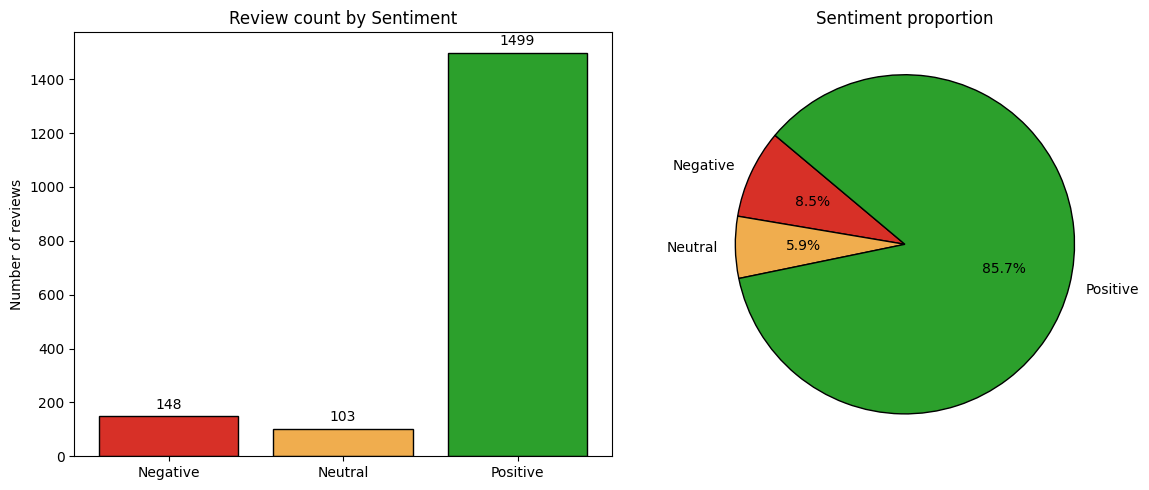

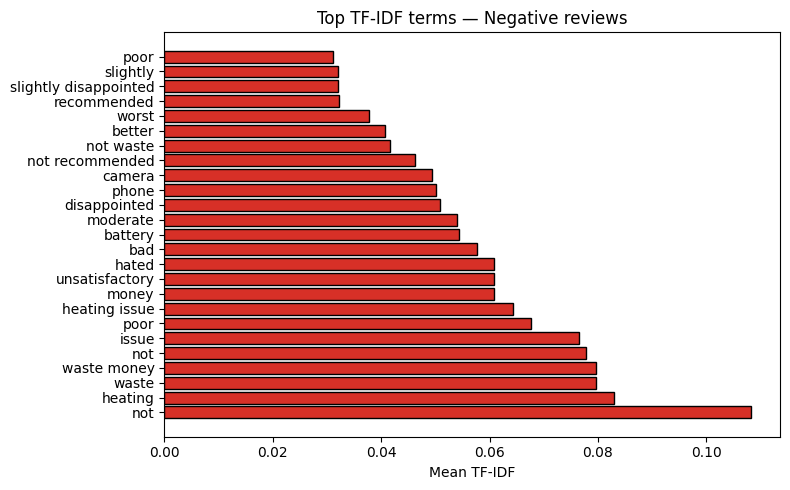

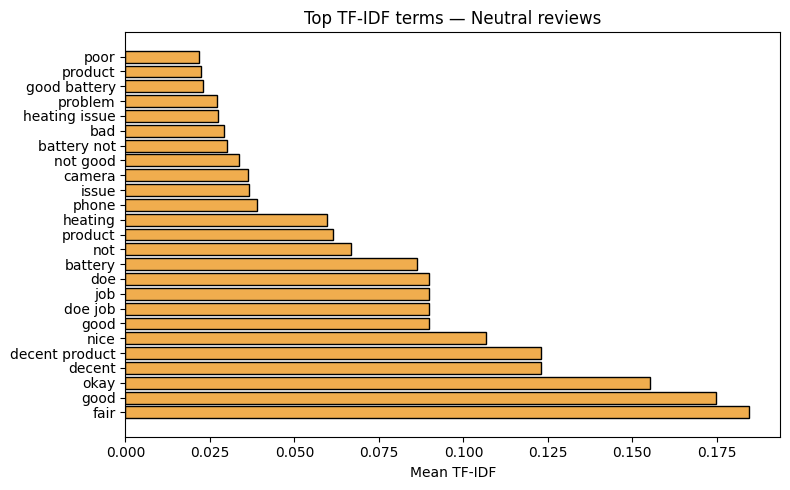

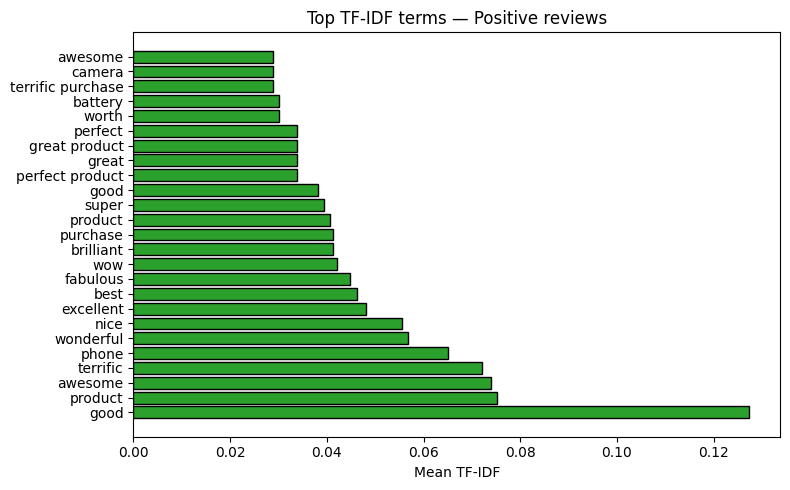

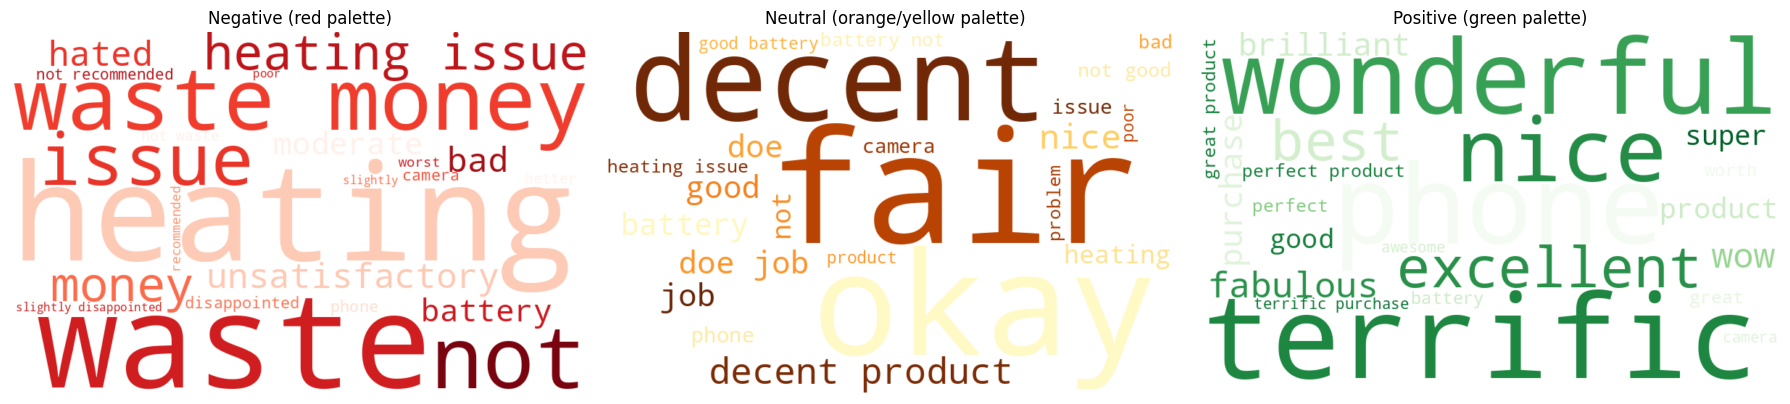

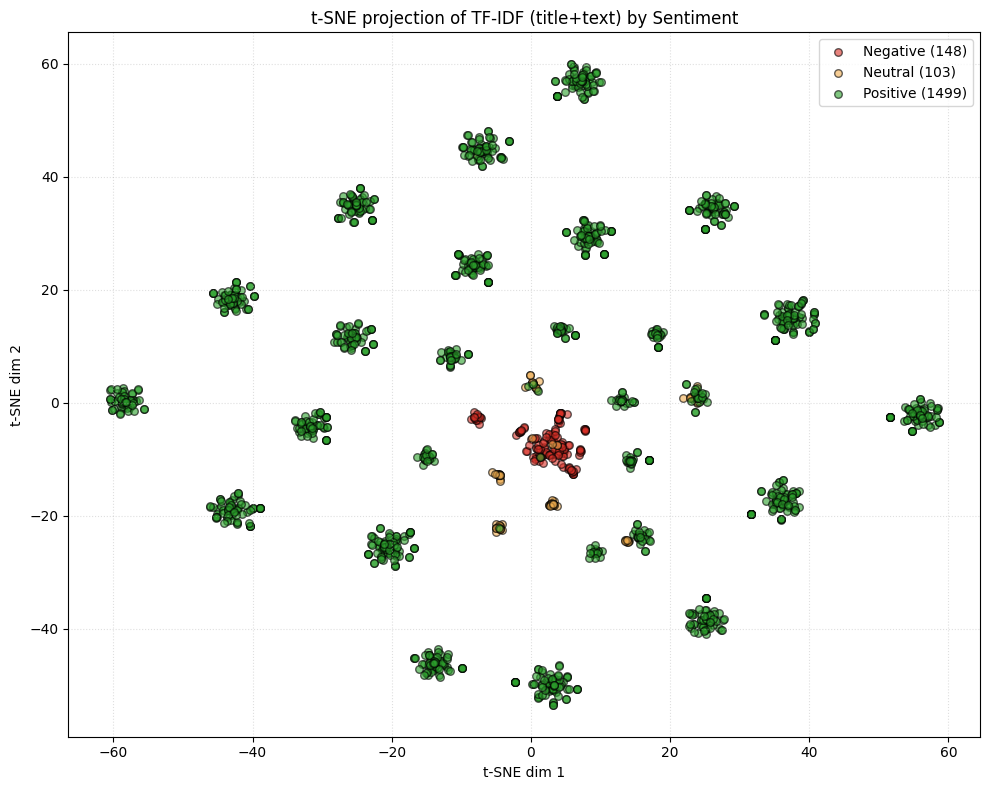

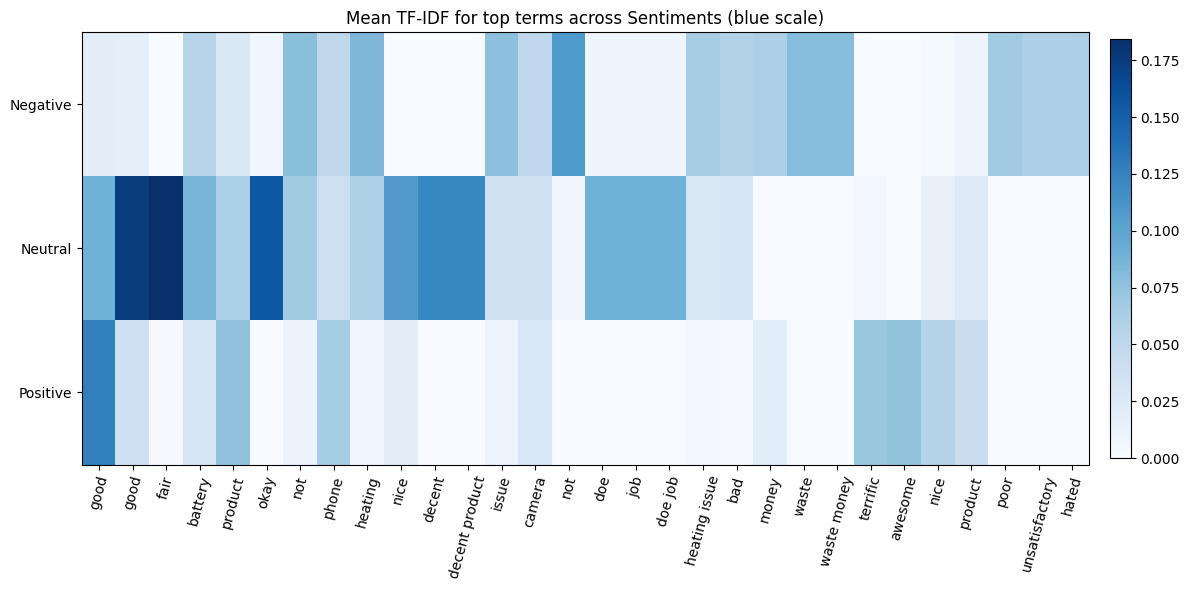


Top negative terms (term : mean tfidf):
not : 0.1082
heating : 0.0830
waste : 0.0796
waste money : 0.0796
not : 0.0778
issue : 0.0765
poor : 0.0676
heating issue : 0.0644
money : 0.0608
unsatisfactory : 0.0608
hated : 0.0608
bad : 0.0577
battery : 0.0543
moderate : 0.0541
disappointed : 0.0509
phone : 0.0501
camera : 0.0493
not recommended : 0.0463
not waste : 0.0416
better : 0.0408
worst : 0.0377
recommended : 0.0323
slightly disappointed : 0.0321
slightly : 0.0321
poor : 0.0311

Top neutral terms:
fair : 0.1845
good : 0.1748
okay : 0.1553
decent : 0.1230
decent product : 0.1230
nice : 0.1068
good : 0.0899
doe job : 0.0897
job : 0.0897
doe : 0.0897
battery : 0.0862
not : 0.0667
product : 0.0614
heating : 0.0597
phone : 0.0390
issue : 0.0367
camera : 0.0362
not good : 0.0336
battery not : 0.0302
bad : 0.0292
heating issue : 0.0275
problem : 0.0269
good battery : 0.0228
product : 0.0224
poor : 0.0218

Top positive terms:
good : 0.1274
product : 0.0753
awesome : 0.0739
terrific : 0.0720

In [56]:
# Visualize TF-IDF + Sentiment (self-contained)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

# ---------- Config / Colors ----------
NEG_COLOR = "#d73027"   # red
NEU_COLOR = "#f0ad4e"   # orange/yellow
POS_COLOR = "#2ca02c"   # green
POS_COLORMAP = "Greens"
NEU_COLORMAP = "YlOrBr"
NEG_COLORMAP = "Reds"
TOP_N = 25               # top terms to plot / cloud size
SVD_DIM = 50             # reduce dim before TSNE
TSNE_DIM = 2

# ---------- Ensure your df exists and Sentiment values are numeric 0/1/2 ----------
# expected: 0 -> negative, 1 -> neutral, 2 -> positive
# If Sentiment column is not numeric, convert or map accordingly before running.
if 'Sentiment' not in df.columns:
    raise ValueError("DataFrame must have a 'Sentiment' column with values 0 (neg), 1 (neu), 2 (pos).")
df = df.copy()
# convert floats/strings to ints if needed
df['Sentiment'] = pd.to_numeric(df['Sentiment'], errors='coerce').astype('Int64')
if df['Sentiment'].isna().any():
    raise ValueError("Some Sentiment values could not be parsed as numeric. Clean Sentiment column first.")

# ---------- TF-IDF (recompute to be sure) ----------
tfidf_title = TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=3)
tfidf_text  = TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=3)

X_title = tfidf_title.fit_transform(df['Cleaned_Review_Title'].astype(str))
X_text  = tfidf_text.fit_transform(df['Cleaned_Review_Text'].astype(str))
X = hstack([X_title, X_text])

# combined feature names (title features first, then text features)
feat_title = list(tfidf_title.get_feature_names_out())
feat_text  = list(tfidf_text.get_feature_names_out())
features_combined = feat_title + feat_text

print("============== TF-IDF SUMMARY ==============")
print("TF-IDF Title Shape:", X_title.shape)
print("TF-IDF Text Shape :", X_text.shape)
print("Final Combined Shape:", X.shape)
print("Title features:", len(feat_title))
print("Text  features:", len(feat_text))

# ---------- Utility: mean TF-IDF per class ----------
def mean_tfidf_by_class(X_sparse, labels, class_value):
    idx = np.where(labels == class_value)[0]
    if len(idx) == 0:
        return np.zeros(X_sparse.shape[1])
    mean_vec = X_sparse[idx].mean(axis=0)   # returns 1xN sparse matrix
    return np.asarray(mean_vec).ravel()

labels = df['Sentiment'].astype(int).values
mean_neg = mean_tfidf_by_class(X, labels, 0)
mean_neu = mean_tfidf_by_class(X, labels, 1)
mean_pos = mean_tfidf_by_class(X, labels, 2)

# ---------- Top terms per sentiment ----------
def top_terms_from_vector(vec, features, topn=TOP_N):
    idx = np.argsort(vec)[::-1][:topn]
    terms = [features[i] for i in idx]
    vals  = vec[idx]
    return list(zip(terms, vals))

top_neg = top_terms_from_vector(mean_neg, features_combined)
top_neu = top_terms_from_vector(mean_neu, features_combined)
top_pos = top_terms_from_vector(mean_pos, features_combined)

# ---------- Plot 1: Sentiment distribution (bar + pie) ----------
plt.figure(figsize=(12,5))
counts = df['Sentiment'].value_counts().reindex([0,1,2]).fillna(0).astype(int)
colors = [NEG_COLOR, NEU_COLOR, POS_COLOR]
plt.subplot(1,2,1)
plt.bar(['Negative','Neutral','Positive'], counts.values, color=colors, edgecolor='k')
plt.title("Review count by Sentiment")
plt.ylabel("Number of reviews")
for i,v in enumerate(counts.values):
    plt.text(i, v + max(counts.values)*0.01, str(v), ha='center', va='bottom', fontsize=10)

plt.subplot(1,2,2)
plt.pie(counts.values, labels=['Negative','Neutral','Positive'], colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor':'k'})
plt.title("Sentiment proportion")
plt.tight_layout()
plt.show()

# ---------- Plot 2: Top-terms bar charts (neg/neu/pos) ----------
def plot_top_terms(top_list, title, bar_color):
    terms, vals = zip(*top_list)
    plt.figure(figsize=(8,5))
    y_pos = np.arange(len(terms))[::-1]
    plt.barh(y_pos, vals[::-1], align='center', color=bar_color, edgecolor='k')
    plt.yticks(y_pos, terms[::-1])
    plt.title(title)
    plt.xlabel("Mean TF-IDF")
    plt.tight_layout()
    plt.show()

plot_top_terms(top_neg, "Top TF-IDF terms — Negative reviews", NEG_COLOR)
plot_top_terms(top_neu, "Top TF-IDF terms — Neutral reviews", NEU_COLOR)
plot_top_terms(top_pos, "Top TF-IDF terms — Positive reviews", POS_COLOR)

# ---------- Plot 3: WordClouds (neg/neu/pos) ----------
def make_wordcloud_from_top(top_list, cmap):
    # wordcloud expects dict(term: weight)
    wc_dict = {t: float(v) for (t,v) in top_list}
    wc = WordCloud(width=800, height=500, background_color='white', colormap=cmap)
    return wc.generate_from_frequencies(wc_dict)

wc_neg = make_wordcloud_from_top(top_neg, NEG_COLORMAP)
wc_neu = make_wordcloud_from_top(top_neu, NEU_COLORMAP)
wc_pos = make_wordcloud_from_top(top_pos, POS_COLORMAP)

plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(wc_neg, interpolation='bilinear'); plt.axis('off'); plt.title('Negative (red palette)')
plt.subplot(1,3,2); plt.imshow(wc_neu, interpolation='bilinear'); plt.axis('off'); plt.title('Neutral (orange/yellow palette)')
plt.subplot(1,3,3); plt.imshow(wc_pos, interpolation='bilinear'); plt.axis('off'); plt.title('Positive (green palette)')
plt.tight_layout()
plt.show()

# ---------- Plot 4: t-SNE scatter of documents colored by sentiment ----------
# 1) reduce with TruncatedSVD (good for sparse TF-IDF)
svd = TruncatedSVD(n_components=min(SVD_DIM, X.shape[1]-1), random_state=42)
X_reduced = svd.fit_transform(X)

# 2) t-SNE to 2D (works better after SVD)
tsne = TSNE(n_components=TSNE_DIM, random_state=42, init='pca', learning_rate='auto')
X_emb = tsne.fit_transform(X_reduced)

# color map per label
cmap_map = {0:NEG_COLOR, 1:NEU_COLOR, 2:POS_COLOR}
colors_points = [cmap_map[l] for l in labels]

plt.figure(figsize=(10,8))
for lab, labname, col in [(0,'Negative',NEG_COLOR),(1,'Neutral',NEU_COLOR),(2,'Positive',POS_COLOR)]:
    idxs = np.where(labels==lab)[0]
    if len(idxs):
        plt.scatter(X_emb[idxs,0], X_emb[idxs,1], s=30, alpha=0.6, label=f"{labname} ({len(idxs)})", color=col, edgecolors='k')

plt.legend()
plt.title("t-SNE projection of TF-IDF (title+text) by Sentiment")
plt.xlabel("t-SNE dim 1")
plt.ylabel("t-SNE dim 2")
plt.grid(True, linestyle=':', alpha=0.4)
plt.tight_layout()
plt.show()

# ---------- Plot 5: Word frequency heat sample (top combined terms across all classes) ----------
# compute overall top terms by mean TF-IDF (or by raw frequency if you prefer)
overall_mean = mean_tfidf_by_class(X, labels, 0)*0  # hack to get shape
overall_mean = (mean_neg + mean_neu + mean_pos) / 3.0
top_overall_idx = np.argsort(overall_mean)[::-1][:30]
top_terms = [features_combined[i] for i in top_overall_idx]

# create matrix of mean tfidf per sentiment for these top terms
vals_matrix = np.vstack([mean_neg[top_overall_idx], mean_neu[top_overall_idx], mean_pos[top_overall_idx]])

plt.figure(figsize=(12,6))
im = plt.imshow(vals_matrix, aspect='auto', cmap='Blues')
plt.yticks([0,1,2], ['Negative','Neutral','Positive'])
plt.xticks(np.arange(len(top_terms)), top_terms, rotation=75)
plt.colorbar(im, fraction=0.02, pad=0.02)
plt.title("Mean TF-IDF for top terms across Sentiments (blue scale)")
plt.tight_layout()
plt.show()

# ---------- Print the top lists for quick textual reference ----------
print("\nTop negative terms (term : mean tfidf):")
for t,v in top_neg[:TOP_N]:
    print(f"{t} : {v:.4f}")

print("\nTop neutral terms:")
for t,v in top_neu[:TOP_N]:
    print(f"{t} : {v:.4f}")

print("\nTop positive terms:")
for t,v in top_pos[:TOP_N]:
    print(f"{t} : {v:.4f}")

print("\nAll visualization generation complete!")


In [64]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=4, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=4, random_state=42)

In [65]:
df.head(3)

,Page,Review_ID,Author_Name,Rating_Stars,Review_Title,Review_Text,City,Posted_Date,Helpful_Count,Certified_Buyer,Converted_Date,Sentiment,Misspelled_Title_Words,Misspelled_Text_Words,Cleaned_Review_Title,Cleaned_Review_Text,Tokenized_Review_Title,Tokenized_Review_Text,review_length,length_category
0,1,P1_REV_007,Swayam Vish,4.0,Pretty good,Good compact phone and having good camera but facing issu in battery because it's 4000 mah and it's not lasting for whole day. I have to carry power bank.I am sharing sample of photos.. it's light balance is very good.,Sehore District,1 month ago,37,Yes,2025-10-27 04:25:15.123540,2,[],[issu],pretty good,good compact phone good camera facing issue battery mah not lasting whole day carry power bank sharing sample photo light balance good,"[pretty, good]","[good, compact, phone, good, camera, facing, issue, battery, mah, not, lasting, whole, day, carry, power, bank, sharing, sample, photo, light, balance, good]",218,long
1,1,P1_REV_010,Amit Kumar Behera,5.0,Mind-blowing purchase,"Powerful performance, excellent display,compact size and amazing camera making it an allrounder phone. The only drawback is battery life.",Bhubaneswar,1 month ago,34,Yes,2025-10-27 04:25:15.123601,2,[],[],mind blowing purchase,powerful performance excellent display compact size amazing camera making allrounder phone drawback battery life,"[mind, blowing, purchase]","[powerful, performance, excellent, display, compact, size, amazing, camera, making, allrounder, phone, drawback, battery, life]",137,medium
2,1,P1_REV_009,Arnab Deb,5.0,Awesome,Today received this phone. It's just outstanding. Battery is good. I m not facing any kind of Heating issue. Camera is far better than I phone. Just shared a photo of my friend in low light.,Dinhata,1 month ago,10,Yes,2025-10-27 04:25:15.123616,2,[],[],awesome,today received phone outstanding battery good not facing kind heating issue camera far better phone shared photo friend low light,[awesome],"[today, received, phone, outstanding, battery, good, not, facing, kind, heating, issue, camera, far, better, phone, shared, photo, friend, low, light]",191,medium


### **Top 30 Uni vs Bi Grams**

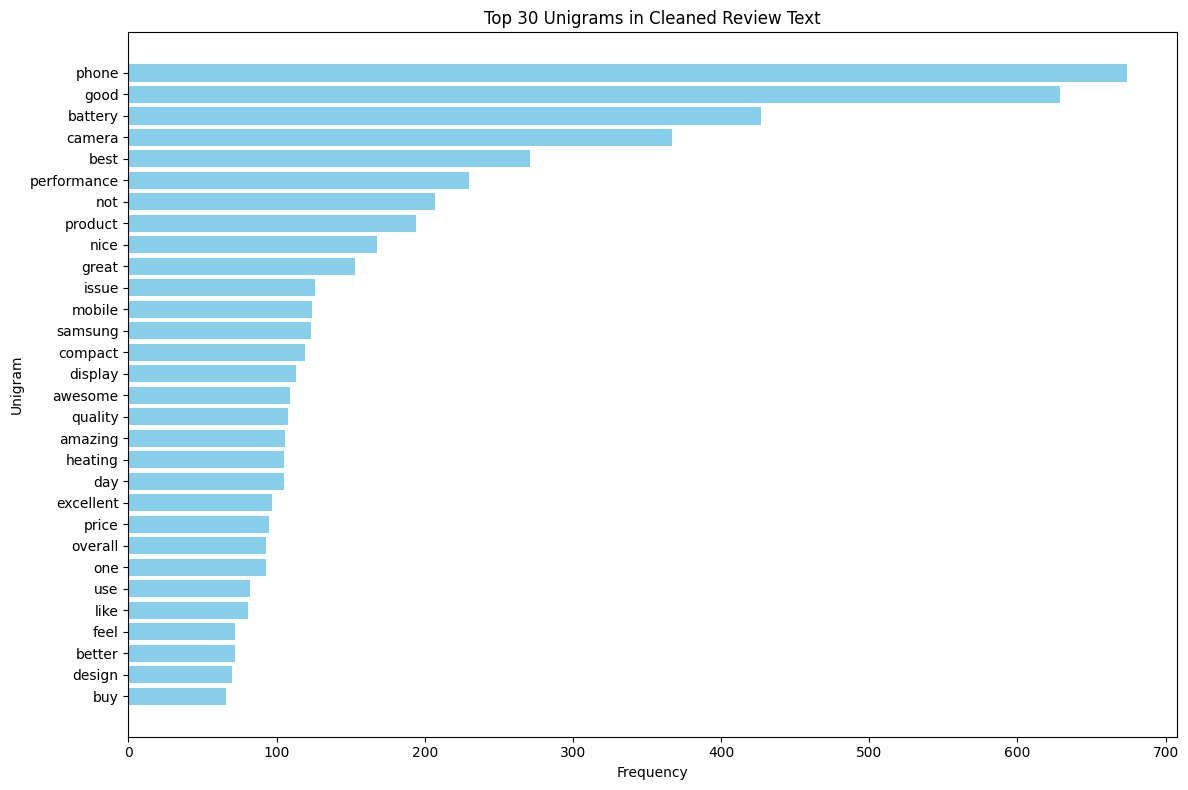

Top 30 Unigrams Frequency Table:


,unigram,frequency
0,phone,674
1,good,629
2,battery,427
3,camera,367
4,best,271
5,performance,230
6,not,207
7,product,194
8,nice,168
9,great,153


In [77]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Handle potential missing values by filling with an empty string
texts = df['Cleaned_Review_Text'].fillna('')

# Initialize CountVectorizer for unigrams (ngram_range=(1,1)) and min_df=2
unigram_vectorizer = CountVectorizer(ngram_range=(1,1), min_df=2)

# Fit and transform the text data
X_unigrams = unigram_vectorizer.fit_transform(texts)

# Get feature names (unigrams)
unigrams = unigram_vectorizer.get_feature_names_out()

# Get frequencies by summing the sparse matrix along axis 0
unigram_freq = np.asarray(X_unigrams.sum(axis=0)).ravel()

# Create a DataFrame for unigrams and their frequencies
unigram_table = (
    pd.DataFrame({
        'unigram': unigrams,
        'frequency': unigram_freq
    })
    .sort_values('frequency', ascending=False)
    .reset_index(drop=True)
)

# Select the top 30 unigrams
top_30_unigrams = unigram_table.head(30)

# Plotting the top 30 unigrams
plt.figure(figsize=(12, 8))
plt.barh(top_30_unigrams['unigram'][::-1], top_30_unigrams['frequency'][::-1], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.title('Top 30 Unigrams in Cleaned Review Text')
plt.tight_layout()
plt.show()

print("Top 30 Unigrams Frequency Table:")
display(top_30_unigrams)

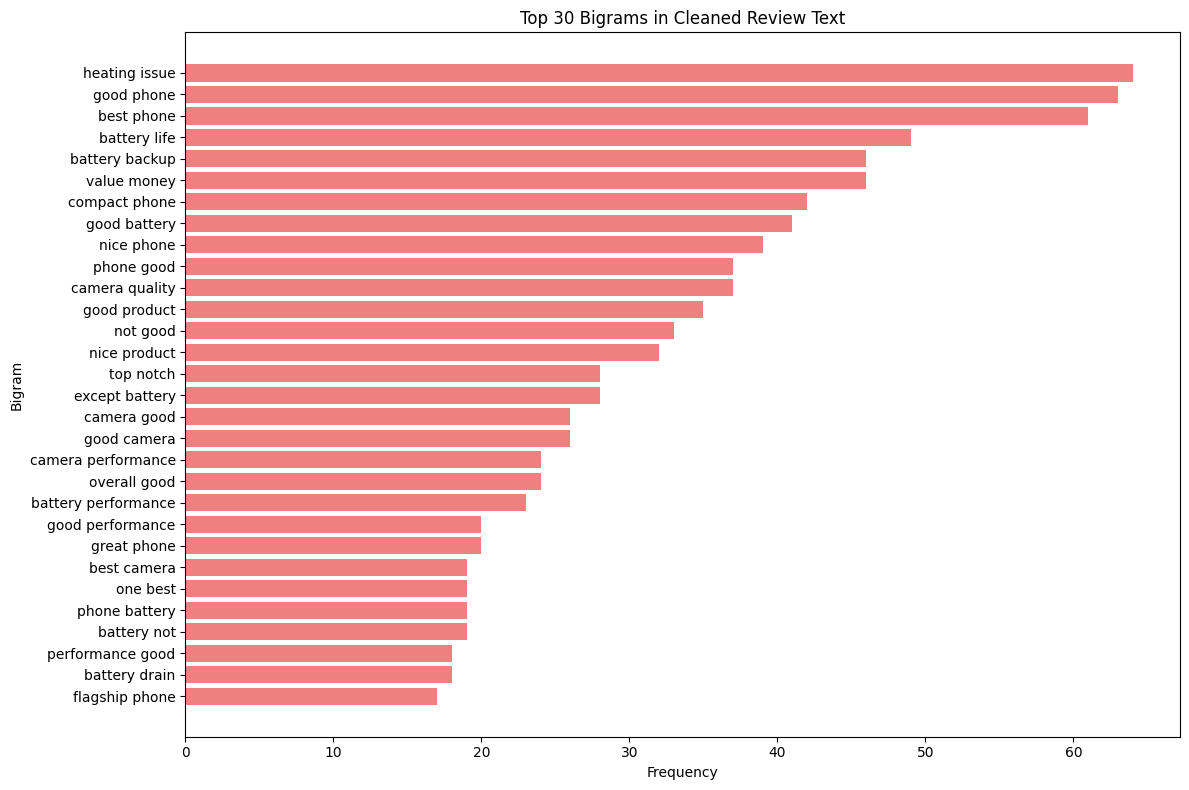

Top 30 Bigrams Frequency Table:


,bigram,frequency
0,heating issue,64
1,good phone,63
2,best phone,61
3,battery life,49
4,battery backup,46
5,value money,46
6,compact phone,42
7,good battery,41
8,nice phone,39
9,phone good,37


In [78]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Handle potential missing values by filling with an empty string
texts = df['Cleaned_Review_Text'].fillna('')

# Initialize CountVectorizer for bigrams (ngram_range=(2,2)) and min_df=2
bigram_vectorizer = CountVectorizer(ngram_range=(2,2), min_df=2)

# Fit and transform the text data
X_bigrams = bigram_vectorizer.fit_transform(texts)

# Get feature names (bigrams)
bigrams = bigram_vectorizer.get_feature_names_out()

# Get frequencies by summing the sparse matrix along axis 0
bigram_freq = np.asarray(X_bigrams.sum(axis=0)).ravel()

# Create a DataFrame for bigrams and their frequencies
bigram_table = (
    pd.DataFrame({
        'bigram': bigrams,
        'frequency': bigram_freq
    })
    .sort_values('frequency', ascending=False)
    .reset_index(drop=True)
)

# Select the top 30 bigrams
top_30_bigrams = bigram_table.head(30)

# Plotting the top 30 bigrams (this will be combined later with unigrams)
plt.figure(figsize=(12, 8))
plt.barh(top_30_bigrams['bigram'][::-1], top_30_bigrams['frequency'][::-1], color='lightcoral')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top 30 Bigrams in Cleaned Review Text')
plt.tight_layout()
plt.show()

print("Top 30 Bigrams Frequency Table:")
display(top_30_bigrams)

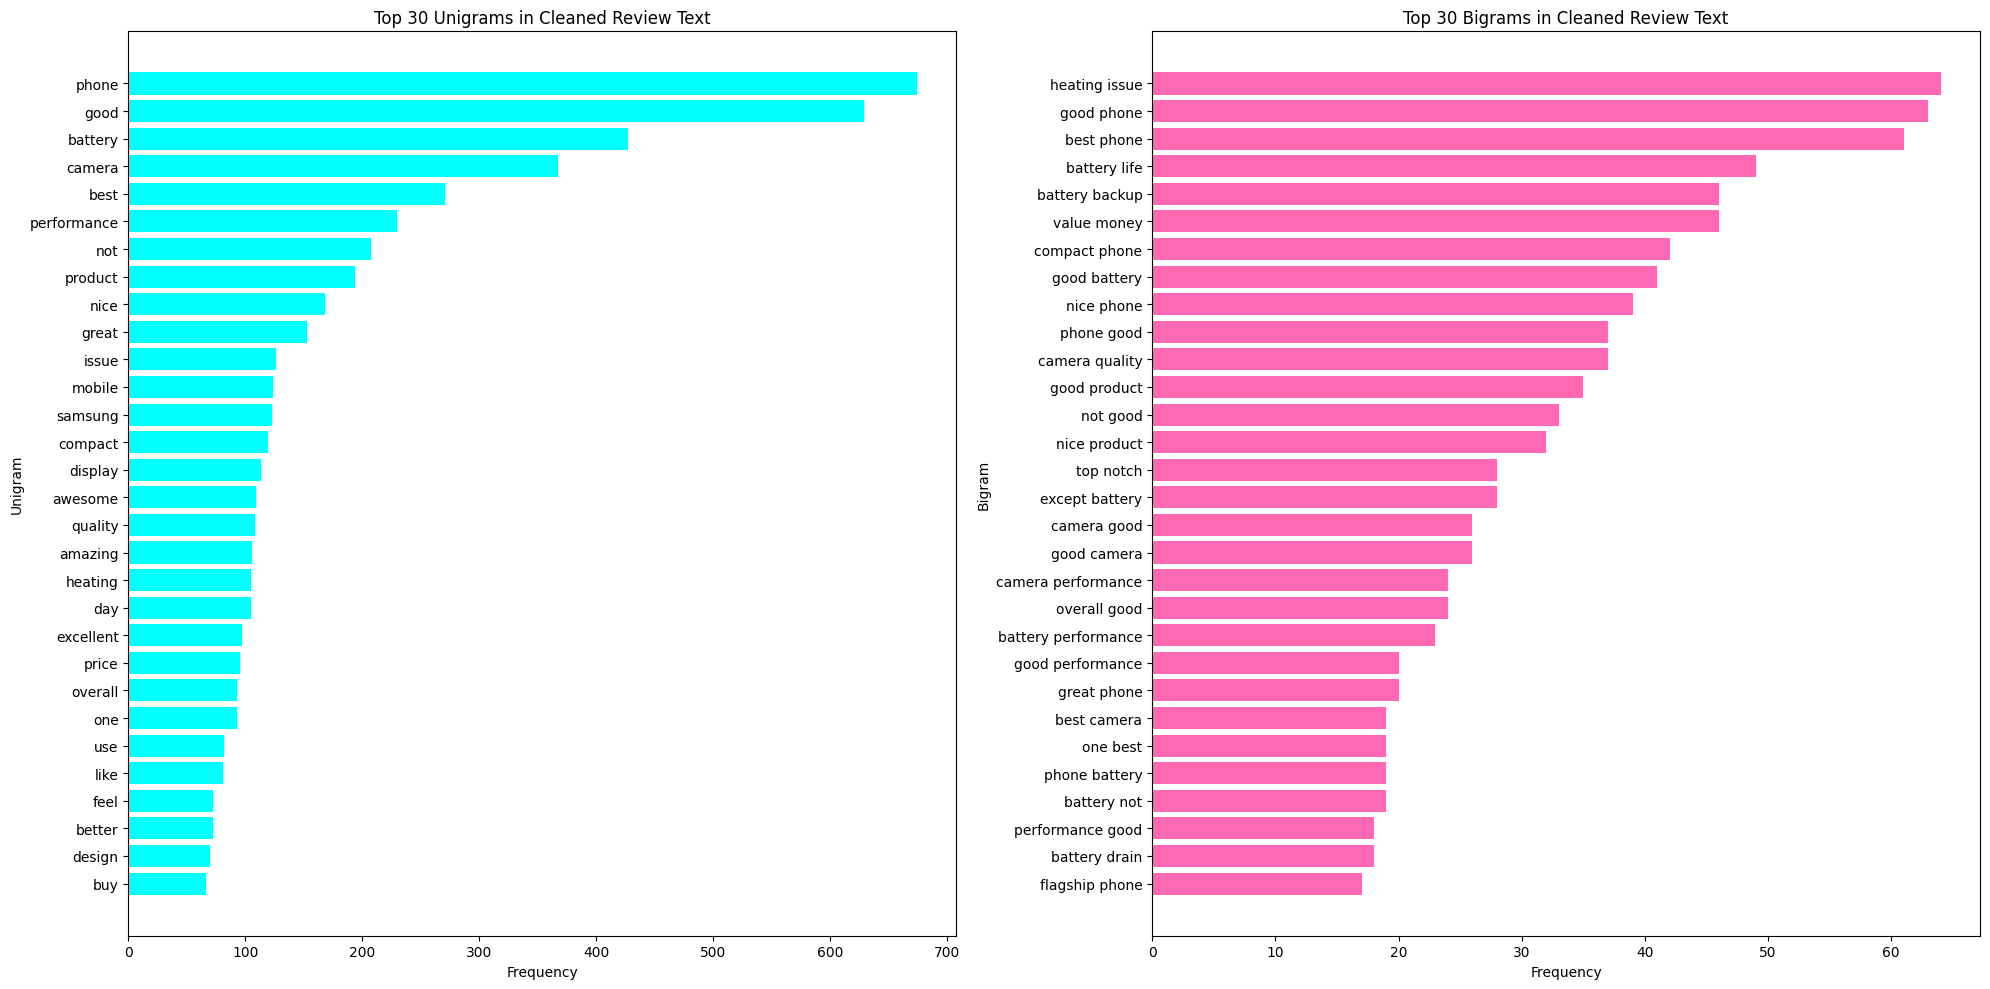

Combined plot of Top 30 Unigrams and Bigrams generated.


In [80]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(20, 10)) # Adjust figsize as needed

# Plotting the top 30 unigrams on the first subplot
axes[0].barh(top_30_unigrams['unigram'][::-1], top_30_unigrams['frequency'][::-1], color='aqua')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Unigram')
axes[0].set_title('Top 30 Unigrams in Cleaned Review Text')

# Plotting the top 30 bigrams on the second subplot
axes[1].barh(top_30_bigrams['bigram'][::-1], top_30_bigrams['frequency'][::-1], color='hotpink')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Bigram')
axes[1].set_title('Top 30 Bigrams in Cleaned Review Text')

plt.tight_layout()
plt.show()

print("Combined plot of Top 30 Unigrams and Bigrams generated.")

### **Aspects and Topics generation form cleaned review text**

In [82]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10  # you can tune this

lda = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    learning_method="batch"
)
doc_topic_dist = lda.fit_transform(X_counts)  # each review -> topic distribution

feature_names = ngrams

def print_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[::-1][:n_top_words]
        top_words = [feature_names[i] for i in top_indices]
        print(f"Topic {topic_idx}: {' | '.join(top_words)}")

print_topics(lda, feature_names, n_top_words=10)

# For each review, assign its dominant topic
df["dominant_topic"] = doc_topic_dist.argmax(axis=1)


Topic 0: excellent product | awesome product | good battery | everything good | love phone | good mobile | thing good | best quality | camera good | compact phone
Topic 1: phone good | good battery | awesome phone | overall good | battery backup | battery life | compact phone | small size | great phone | issue battery
Topic 2: except battery | camera performance | top notch | not working | good performance | best mobile | battery life | everything top | good except | value money
Topic 3: battery drain | great phone | phone price | price range | heating issue | drain fast | little bit | performance battery | performance good | overall performance
Topic 4: nice phone | compact phone | amazing product | mobile phone | battery life | feel like | heating issue | one best | best mobile | great performance
Topic 5: heavy user | low light | samsung galaxy | good phone | phone good | overall good | battery backup | not much | charging speed | battery life
Topic 6: best phone | nice product | va

In [84]:
def detect_aspects(text):
    text = text.lower()

    # these can be entered or changed according to the need
    aspect_keywords = {
        "camera": ["camera", "photo", "picture", "image"],
        "battery": ["battery", "mah", "power bank", "powerbank"],
        "performance": ["performance", "lag", "smooth", "speed", "slow", "fast"],
        "display": ["display", "screen", "brightness"],
        "heating": ["heat", "heating", "overheat", "hot"],
    }

    found = []
    for aspect, keys in aspect_keywords.items():
        if any(k in text for k in keys):
            found.append(aspect)
    return found

df["aspects"] = df["Cleaned_Review_Text"].fillna("").apply(detect_aspects)

display(df[["Cleaned_Review_Text", "aspects"]].head())


,Cleaned_Review_Text,aspects
0,good compact phone good camera facing issue battery mah not lasting whole day carry power bank sharing sample photo light balance good,"[camera, battery, heating]"
1,powerful performance excellent display compact size amazing camera making allrounder phone drawback battery life,"[camera, battery, performance, display]"
2,today received phone outstanding battery good not facing kind heating issue camera far better phone shared photo friend low light,"[camera, battery, heating]"
3,using day writing review overall good compact handy phone want beast camera clean battery backup slightly less okay average use want mobile daily gaming battery backup lesser want good handy samsung phone,"[camera, battery]"
4,everything excellent battery average,[battery]


In [86]:
# explode aspects so each (review, aspect) is one row
aspect_df = df.explode("aspects").dropna(subset=["aspects"])

# sentiment counts per aspect
aspect_sent_counts = (
    aspect_df
    .groupby(["aspects", "Sentiment"])
    .size()
    .unstack(fill_value=0)
    .rename(columns={0: "neg", 1: "neu", 2: "pos"})
)

# compute ratios
aspect_sent_counts["total"] = aspect_sent_counts.sum(axis=1)
aspect_sent_counts["neg_share"] = aspect_sent_counts["neg"] / aspect_sent_counts["total"]
aspect_sent_counts["pos_share"] = aspect_sent_counts["pos"] / aspect_sent_counts["total"]

display(aspect_sent_counts)


Sentiment,neg,neu,pos,total,neg_share,pos_share
aspects,,,,,,
battery,37,46,312,395,0.093671,0.789873
camera,39,24,289,352,0.110795,0.821023
display,5,7,130,142,0.035211,0.915493
heating,51,29,89,169,0.301775,0.526627
performance,16,21,280,317,0.050473,0.883281


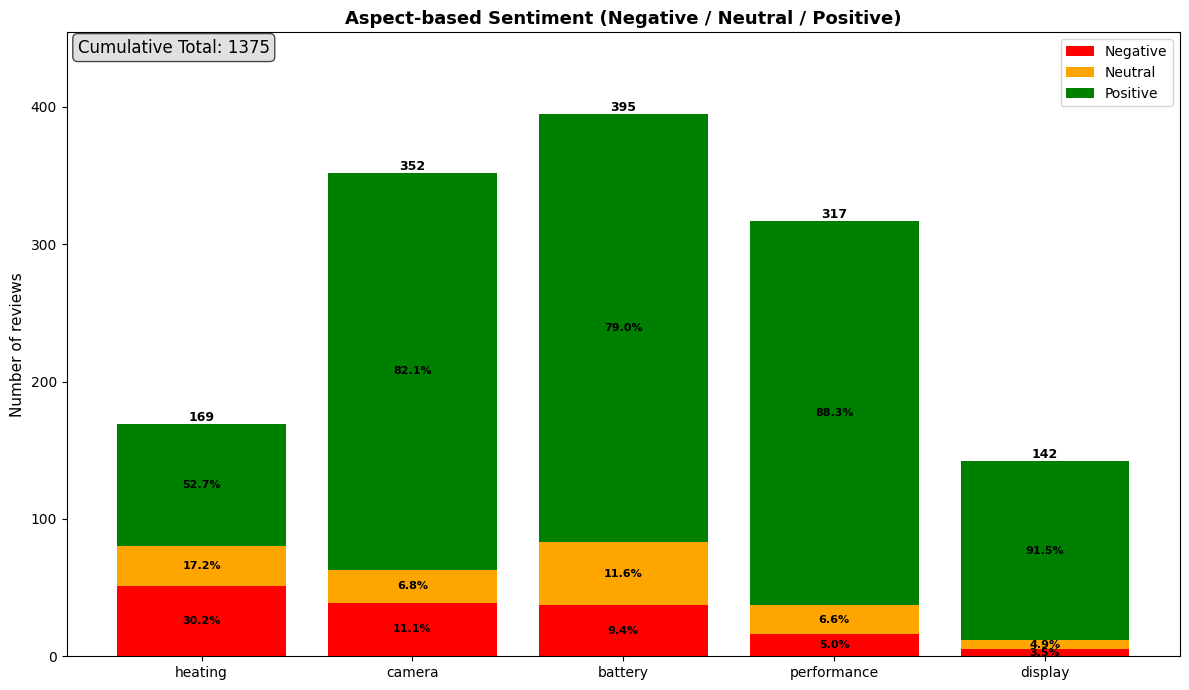

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure aspect_sent_counts is loaded from the previous step
# For this execution, we assume it's available from the kernel state.
aspect_df = aspect_sent_counts.copy()

# order of aspects on x-axis (optional, here: sort by negative share, descending)
aspect_df = aspect_df.sort_values("neg_share", ascending=False)

aspects   = aspect_df.index
neg_counts = aspect_df["neg"].values
neu_counts = aspect_df["neu"].values
pos_counts = aspect_df["pos"].values

# --------------------------------------------------------
# 3) Create stacked bar chart (red = neg, orange = neu, green = pos)
# --------------------------------------------------------
x = np.arange(len(aspects))

fig, ax = plt.subplots(figsize=(12, 7)) # Adjust figsize for more space

bar_neg = ax.bar(x, neg_counts, color="red", label="Negative")
bar_neu = ax.bar(x, neu_counts, bottom=neg_counts,
                 color="orange", label="Neutral")
bar_pos = ax.bar(x, pos_counts, bottom=neg_counts + neu_counts,
                 color="green", label="Positive")

# --------------------------------------------------------
# 4) Add percentage labels inside bars and total counts above bars
# --------------------------------------------------------
for i in range(len(aspects)):
    total_for_aspect = neg_counts[i] + neu_counts[i] + pos_counts[i]
    x_pos = bar_neg[i].get_x() + bar_neg[i].get_width() / 2

    # Add percentage for Negative (if not zero)
    if neg_counts[i] > 0:
        pct = (neg_counts[i] / total_for_aspect) * 100
        ax.text(x_pos, bar_neg[i].get_y() + bar_neg[i].get_height() / 2,
                f"{pct:.1f}%", ha='center', va='center', fontsize=8, color='black', fontweight='bold')

    # Add percentage for Neutral (if not zero)
    if neu_counts[i] > 0:
        pct = (neu_counts[i] / total_for_aspect) * 100
        ax.text(x_pos, bar_neu[i].get_y() + bar_neu[i].get_height() / 2,
                f"{pct:.1f}%", ha='center', va='center', fontsize=8, color='black', fontweight='bold')

    # Add percentage for Positive (if not zero)
    if pos_counts[i] > 0:
        pct = (pos_counts[i] / total_for_aspect) * 100
        ax.text(x_pos, bar_pos[i].get_y() + bar_pos[i].get_height() / 2,
                f"{pct:.1f}%", ha='center', va='center', fontsize=8, color='black', fontweight='bold')

    # Add total count above the stacked bar
    ax.text(x_pos, total_for_aspect, str(int(total_for_aspect)),
            ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')

# --------------------------------------------------------
# 5) Make it easy to read (titles, ticks, annotations)
# --------------------------------------------------------
ax.set_xticks(x)
ax.set_xticklabels(aspects, fontsize=10)

# Adjust y-axis limit to accommodate the total count labels
max_total = aspect_df["total"].max()
ax.set_ylim(0, max_total * 1.15) # Add 15% extra space above the highest bar

ax.set_ylabel("Number of reviews", fontsize=11)
ax.set_title("Aspect-based Sentiment (Negative / Neutral / Positive)", fontsize=13, fontweight="bold")

ax.legend(loc="upper right")

# Calculate and display cumulative total in the top-left corner
cumulative_total = aspect_df["total"].sum()
ax.text(0.01, 0.99, f'Cumulative Total: {int(cumulative_total)}', transform=ax.transAxes,
        ha='left', va='top', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="lightgray", ec="black", lw=1, alpha=0.7))

plt.tight_layout()
plt.show()

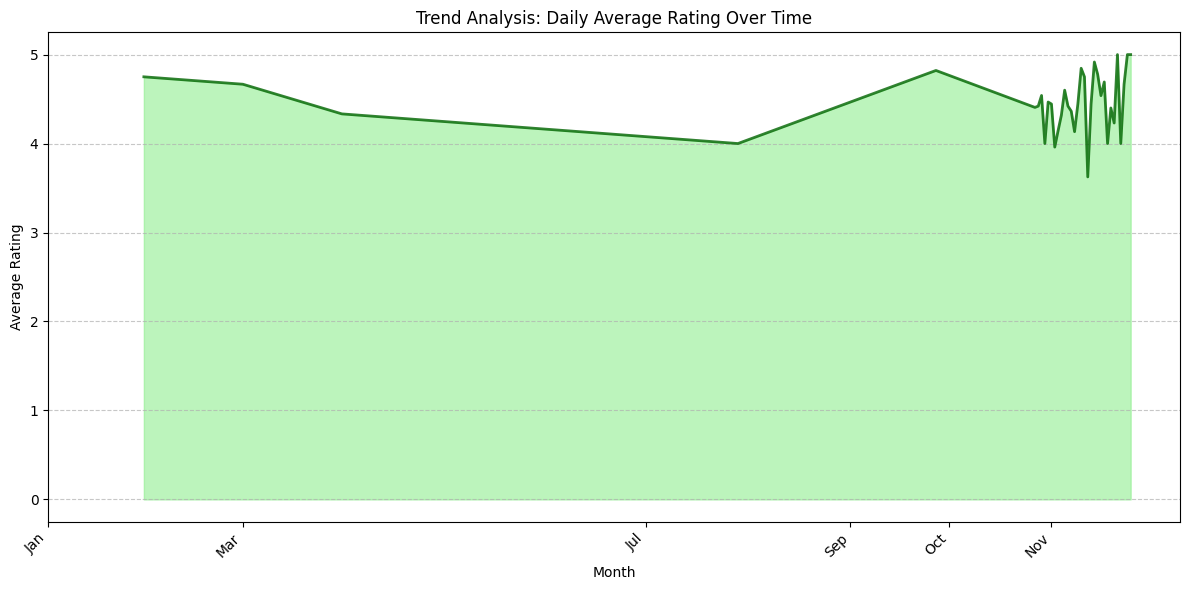

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re


# clean rating
df["Rating_Stars"] = pd.to_numeric(df["Rating_Stars"], errors="coerce")

# function to convert "1 month ago", "5 days ago" → actual date
def convert_relative_date(text):
    if pd.isna(text):
        return None

    text = text.lower()
    now = datetime.now()

    # extract number - check if match exists before calling .group()
    match = re.search(r'\d+', text)
    if not match:
        return None # No digits found, return None

    num = int(match.group())

    if "day" in text:
        return now - timedelta(days=num)
    if "month" in text:
        return now - timedelta(days=num*30)
    if "year" in text:
        return now - timedelta(days=num*365)
    if "hour" in text:
        return now - timedelta(hours=num)

    return None

# convert dates
df["Converted_Date"] = df["Posted_Date"].apply(convert_relative_date)

# drop missing and explicitly make a copy to avoid SettingWithCopyWarning
df_clean = df.dropna(subset=["Converted_Date", "Rating_Stars"]).copy()

# Sort by date for proper plotting
df_clean = df_clean.sort_values(by='Converted_Date')

# Group by day for daily average ratings
daily_data = df_clean.groupby(df_clean["Converted_Date"].dt.normalize())["Rating_Stars"].mean().reset_index()
daily_data = daily_data.sort_values('Converted_Date')


# plot daily average ratings as an area plot
plt.figure(figsize=(12,6))

# Area plot with a fill color and a distinct line color
plt.fill_between(
    daily_data['Converted_Date'],
    daily_data['Rating_Stars'],
    color="lightgreen", # Changed to light green
    alpha=0.6
)

# Optional: Add a line on top of the area for clarity
plt.plot(
    daily_data['Converted_Date'],
    daily_data['Rating_Stars'],
    color="darkgreen", # Changed to dark green
    alpha=0.8,
    linewidth=2
)

plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.title("Trend Analysis: Daily Average Rating Over Time")

# Set x-axis ticks to display month names only (from the earliest to latest date in df_clean)
# Create a list of unique months for x-axis labels from the daily data
unique_periods = daily_data['Converted_Date'].dt.to_period('M').unique()
# Sort the PeriodArray directly and then get the start_time for each period
month_labels = [p.start_time for p in sorted(unique_periods)]

plt.xticks(
    month_labels,
    [m.strftime('%b') for m in month_labels], # Only month name as requested ('%b' gives Jan, Feb, etc.)
    rotation=45,
    ha='right'
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

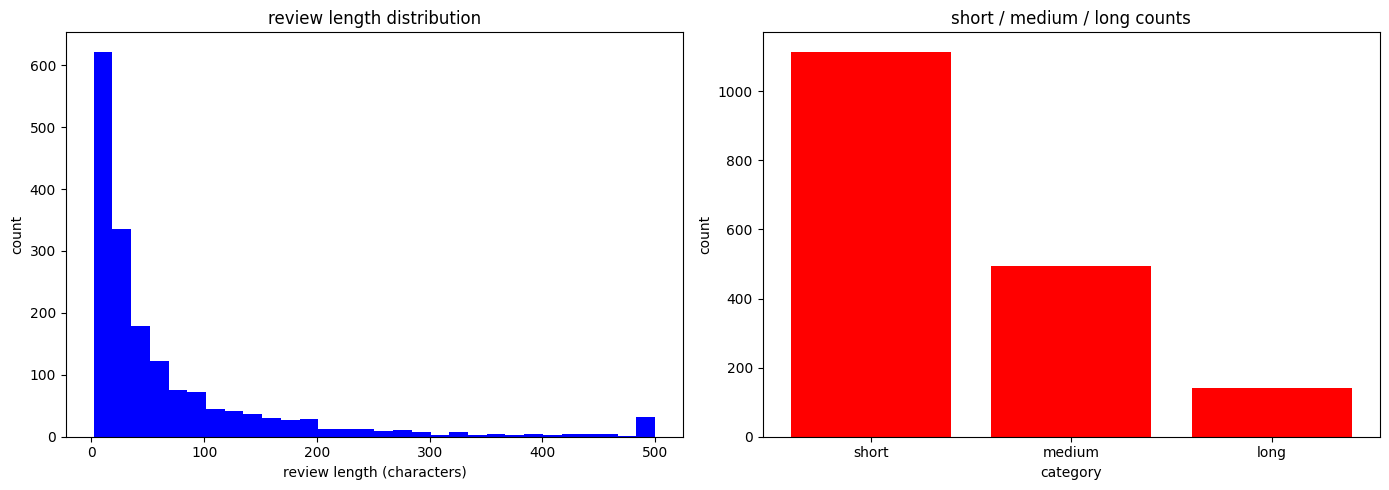

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# calculate review length
df["review_length"] = df["Review_Text"].astype(str).apply(len)

# categorize review length
def categorize_length(x):
    if x < 50:
        return "short"
    elif x < 200:
        return "medium"
    else:
        return "long"

df["length_category"] = df["review_length"].apply(categorize_length)

# count categories
cat_counts = df["length_category"].value_counts()

# create side by side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# left plot: histogram
axes[0].hist(df["review_length"], bins=30, color="blue")
axes[0].set_title("review length distribution")
axes[0].set_xlabel("review length (characters)")
axes[0].set_ylabel("count")

# right plot: bar chart
axes[1].bar(cat_counts.index, cat_counts.values, color="red")
axes[1].set_title("short / medium / long counts")
axes[1].set_xlabel("category")
axes[1].set_ylabel("count")

plt.tight_layout()
plt.show()


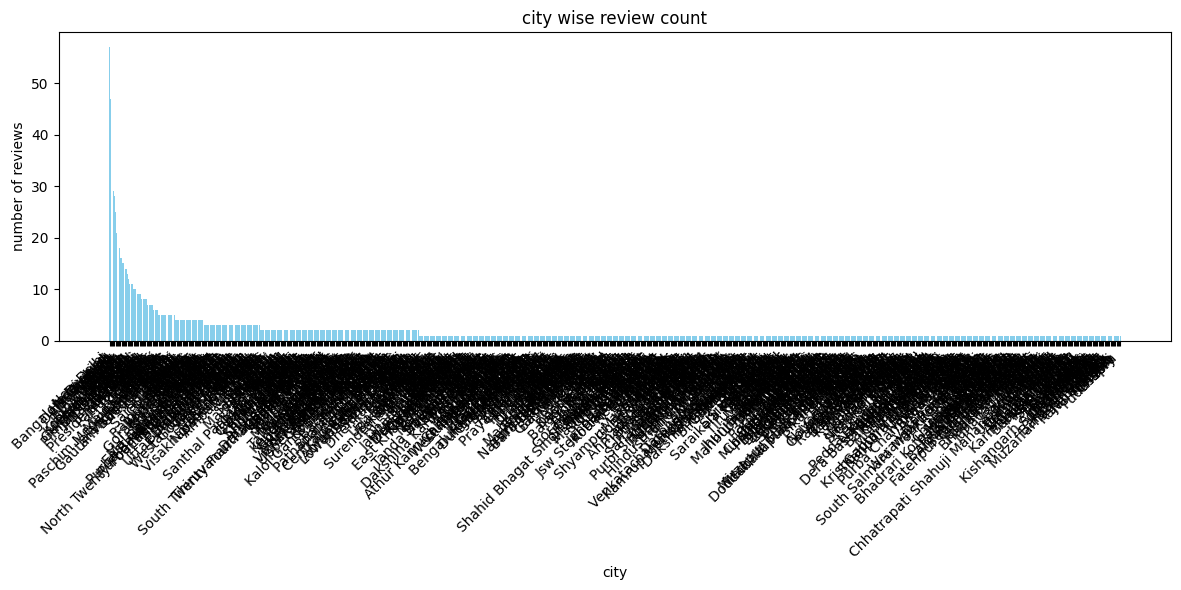

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# replace missing city values with "unknown"
df["City"] = df["City"].fillna("unknown")

# count reviews per city
city_counts = df["City"].value_counts()

# plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(city_counts.index, city_counts.values, color="skyblue")

# labels
plt.title("city wise review count")
plt.xlabel("city")
plt.ylabel("number of reviews")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


df.isna().sum()

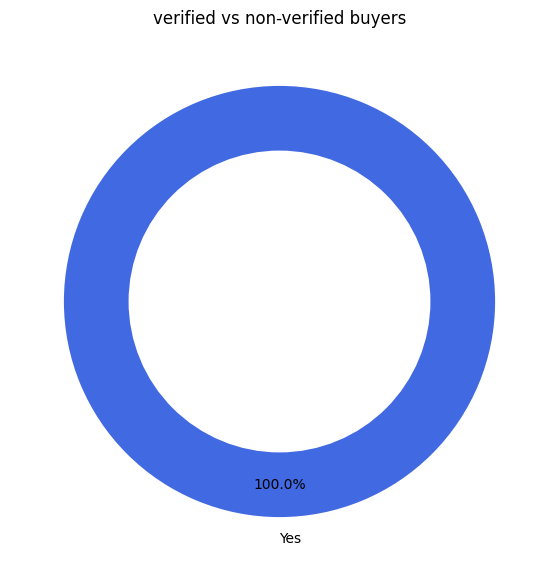

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# count verified vs non verified
buyer_counts = df["Certified_Buyer"].value_counts()

# labels + colors
labels = buyer_counts.index
colors = ["royalblue", "tomato"]  # blue = yes, red = no

# make the figure
plt.figure(figsize=(7,7))

# create donut chart
plt.pie(
    buyer_counts.values,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.85
)

# add white circle for donut effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# title
plt.title("verified vs non-verified buyers")

plt.show()



==== rating summary ====
total reviews: 1750

counts:
1     102
2      46
3     103
4     283
5    1216
dtype: int64

percentages (%):
1     5.83
2     2.63
3     5.89
4    16.17
5    69.49
dtype: float64


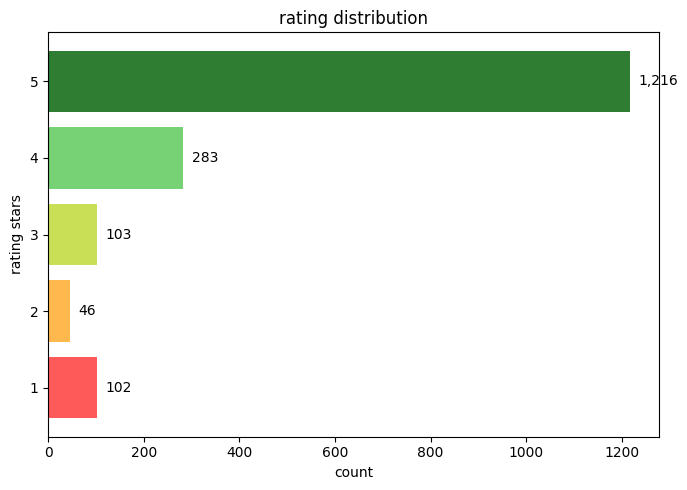

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------------
# clean rating column
df['Rating_Stars'] = pd.to_numeric(df['Rating_Stars'], errors='coerce')

# -------------------------------------------------------
# count ratings 1–5
rating_counts = df['Rating_Stars'].value_counts().sort_index()

# ensure 1 to 5 exist (fill missing with 0)
rating_counts = pd.Series({i: rating_counts.get(i, 0) for i in range(1, 6)})

# -------------------------------------------------------
# total ratings
total_reviews = rating_counts.sum()

# percentage for each rating
rating_percent = (rating_counts / total_reviews * 100).round(2)

# print summary
print("\n==== rating summary ====")
print("total reviews:", total_reviews)
print("\ncounts:")
print(rating_counts)
print("\npercentages (%):")
print(rating_percent)

# -------------------------------------------------------
# flipkart-style horizontal bar plot
colors = [
    "#ff5a5a",   # 1 star (red)
    "#ffb84d",   # 2 star (orange)
    "#c9df56",   # 3 star (yellow-green)
    "#76d275",   # 4 star (light green)
    "#2e7d32"    # 5 star (dark green)
]

plt.figure(figsize=(7,5))

plt.barh(
    rating_counts.index.astype(str),
    rating_counts.values,
    color=colors
)

# add value labels to the right side
for i, v in enumerate(rating_counts.values):
    plt.text(v + (total_reviews * 0.01), i, f"{v:,}", va='center')

plt.title("rating distribution")
plt.xlabel("count")
plt.ylabel("rating stars")
plt.tight_layout()
plt.show()


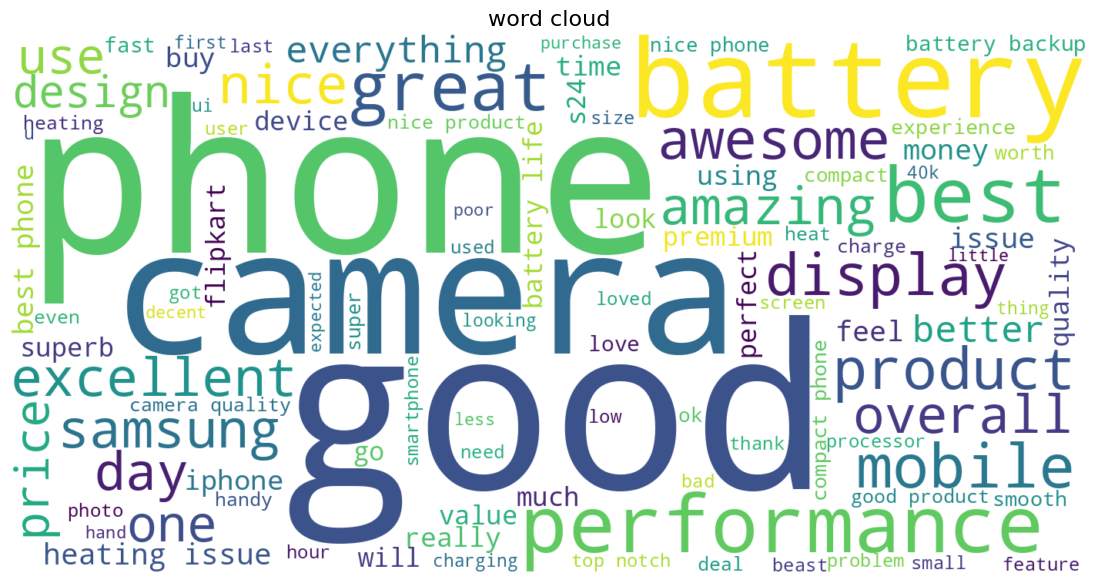

In [61]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


# pick the column you want (review titles here)
text_data = df["Review_Text"].dropna().astype(str).str.lower()

# join everything into one text
text = " ".join(text_data)

# stopwords
stopwords = set(STOPWORDS)

# generate 100-word word cloud
wc = WordCloud(
    width=1400,
    height=700,
    background_color="white",
    stopwords=stopwords,
    max_words=100
).generate(text)

# plot it
plt.figure(figsize=(14,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("word cloud", fontsize=16)
plt.show()


### **Sentiment Distribution by Review Length Category**

In [96]:
sentiment_by_length = (
    df.groupby(['length_category', 'Sentiment'])
    .size()
    .unstack(fill_value=0) # Fill NaN with 0 for combinations that don't exist
    .rename(columns={0: 'Negative', 1: 'Neutral', 2: 'Positive'}) # Rename sentiment columns
)

print("Sentiment Distribution by Review Length Category:")
display(sentiment_by_length)

Sentiment Distribution by Review Length Category:


Sentiment,Negative,Neutral,Positive
length_category,,,
long,12,14,114
medium,42,35,418
short,94,54,967


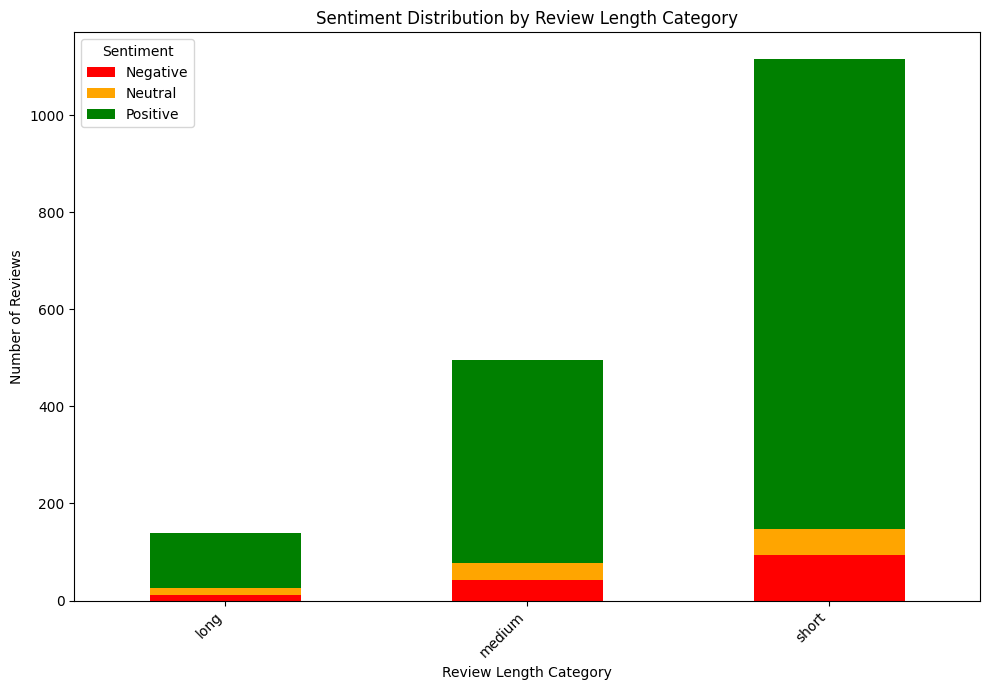

In [97]:
import matplotlib.pyplot as plt

# Plotting the stacked bar chart
sentiment_by_length.plot(kind='bar', stacked=True, figsize=(10, 7), color=['red', 'orange', 'green'])
plt.title('Sentiment Distribution by Review Length Category')
plt.xlabel('Review Length Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


# Task
Identify common complaints from product reviews by leveraging the existing aspect-based sentiment analysis. Count the occurrences of negative and neutral sentiments for each identified aspect ('heating', 'camera', 'battery', 'performance', 'display') and visualize the top complaints in a bar chart, summarizing the prevalent issues and offering insights for product improvement.

## Identify Common Complaints

### Subtask:
Define a list of common complaint keywords and identify which of these are present in each 'Cleaned_Review_Text'. A new column will be created to store the identified complaints for each review.


**Reasoning**:
First, I'll define a dictionary of common complaint keywords to categorize issues in reviews. Then, I will create a function that identifies these keywords in a given text and returns a list of matching complaint categories. Finally, I will apply this function to the 'Cleaned_Review_Text' column of the DataFrame and store the results in a new 'complaints' column.



In [101]:
complaint_keywords = {
    "heating": ["heat", "heating", "hot", "warm", "overheat", "temperature"],
    "camera": ["camera", "photo", "picture", "image", "lens", "megapixel", "zoom", "clarity", "night mode", "focus"],
    "battery": ["battery", "drain", "backup", "life", "charging", "mah", "power"],
    "performance": ["slow", "lag", "hang", "performance", "speed", "smooth", "stutter", "processor", "chipset"],
    "display": ["display", "screen", "amoled", "brightness", "color", "panel", "resolution"],
    "price": ["price", "expensive", "cost", "value", "cheap"],
    "software": ["software", "ui", "bug", "glitch", "update", "android", "oneui"],
    "design": ["design", "build", "looks", "premium", "handy", "compact"],
    "speaker": ["speaker", "sound", "audio", "volume"],
    "fingerprint": ["fingerprint", "scanner", "sensor", "unlock"],
    "delivery": ["delivery", "delivered", "shipping", "shipment", "late", "delay", "received"],
    "refund": ["refund", "money back", "return money"],
    "returns": ["return", "returning", "pickup", "exchange"],
    "quality": ["quality", "good quality", "bad quality", "poor quality", "build quality"]
}

def identify_complaints(text):
    if not isinstance(text, str):
        return []
    text = text.lower()
    found_complaints = []
    for category, keywords in complaint_keywords.items():
        for keyword in keywords:
            if keyword in text:
                found_complaints.append(category)
                break # Move to the next category once a keyword is found
    return found_complaints

df['complaints'] = df['Cleaned_Review_Text'].apply(identify_complaints)

print("First 5 rows of 'Cleaned_Review_Text' and new 'complaints' column:")
display(df[['Cleaned_Review_Text', 'complaints']].head())

First 5 rows of 'Cleaned_Review_Text' and new 'complaints' column:


,Cleaned_Review_Text,complaints
0,good compact phone good camera facing issue battery mah not lasting whole day carry power bank sharing sample photo light balance good,"[heating, camera, battery, design]"
1,powerful performance excellent display compact size amazing camera making allrounder phone drawback battery life,"[camera, battery, performance, display, design]"
2,today received phone outstanding battery good not facing kind heating issue camera far better phone shared photo friend low light,"[heating, camera, battery, delivery]"
3,using day writing review overall good compact handy phone want beast camera clean battery backup slightly less okay average use want mobile daily gaming battery backup lesser want good handy samsung phone,"[camera, battery, design]"
4,everything excellent battery average,[battery]


**Reasoning**:
To analyze complaints, I need to focus on reviews with negative or neutral sentiments and then count how many times each complaint aspect appears within those sentiments. This will help identify the most prevalent issues.



Complaint counts for Negative and Neutral sentiments:


Sentiment,Negative,Neutral,Total_Complaints
complaints,,,
battery,41,46,87
heating,51,29,80
camera,39,24,63
performance,16,21,37
software,8,8,16
display,8,7,15
price,4,8,12
design,1,10,11
fingerprint,3,4,7


ValueError: keyword ha is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

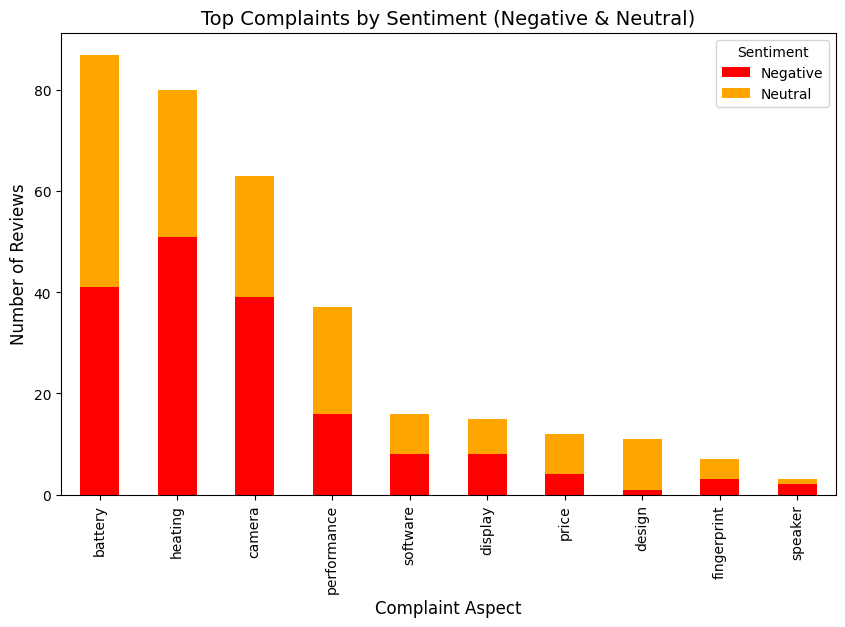

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for negative (0) and neutral (1) sentiments
complaint_df = df[df['Sentiment'].isin([0, 1])].copy()

# Explode the 'complaints' list to have one row per complaint
complaint_df_exploded = complaint_df.explode('complaints').dropna(subset=['complaints'])

# Count the occurrences of each complaint aspect for negative and neutral sentiments
complaint_counts = (
    complaint_df_exploded
    .groupby(['complaints', 'Sentiment'])
    .size()
    .unstack(fill_value=0) # Fill NaN with 0 for combinations that don't exist
)

# Rename sentiment columns for clarity
complaint_counts = complaint_counts.rename(columns={0: 'Negative', 1: 'Neutral'})

# Calculate total complaints per aspect
complaint_counts['Total_Complaints'] = complaint_counts['Negative'] + complaint_counts['Neutral']

# Sort by total complaints for better visualization
complaint_counts = complaint_counts.sort_values(by='Total_Complaints', ascending=False)

print("Complaint counts for Negative and Neutral sentiments:")
display(complaint_counts)

# Visualize the top complaints
fig, ax = plt.subplots(figsize=(10, 6))

# Plot stacked bar chart for Negative and Neutral complaints
complaint_counts[['Negative', 'Neutral']].plot(kind='bar', stacked=True, ax=ax, color=['red', 'orange'])

ax.set_title('Top Complaints by Sentiment (Negative & Neutral)', fontsize=14)
ax.set_xlabel('Complaint Aspect', fontsize=12)
ax.set_ylabel('Number of Reviews', fontsize=12)
ax.tick_params(axis='x', rotation=45, ha='right')
ax.legend(title='Sentiment')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Reasoning**:
The error message `ValueError: keyword ha is not recognized` indicates that `ha` (horizontal alignment) is not a valid argument for `ax.tick_params()`. This parameter should be applied directly to the tick labels using `ax.set_xticklabels()` instead. I will modify the plotting code accordingly.



Complaint counts for all sentiments:


Sentiment,Negative,Neutral,Positive,Total_Complaints
complaints,,,,
returns,3,0,1,4
fingerprint,3,4,4,11
speaker,2,1,17,20
delivery,4,2,25,31
quality,11,5,76,92
software,8,8,93,109
price,4,8,132,144
display,8,7,137,152
heating,51,29,95,175


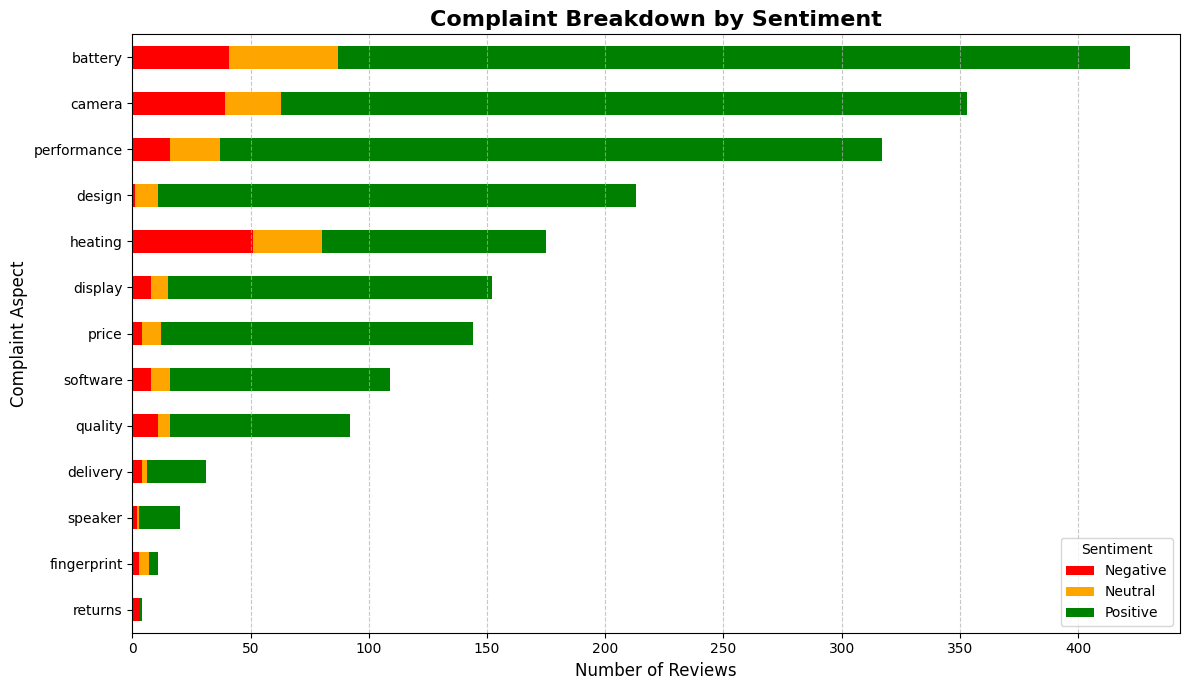

In [107]:
import matplotlib.pyplot as plt
import pandas as pd

# Explode the 'complaints' list to have one row per complaint
complaint_df_exploded = df.explode('complaints').dropna(subset=['complaints'])

# Count the occurrences of each complaint aspect for all three sentiments
complaint_counts_all_sentiments = (
    complaint_df_exploded
    .groupby(['complaints', 'Sentiment'])
    .size()
    .unstack(fill_value=0) # Fill NaN with 0 for combinations that don't exist
)

# Rename sentiment columns for clarity
complaint_counts_all_sentiments = complaint_counts_all_sentiments.rename(columns={0: 'Negative', 1: 'Neutral', 2: 'Positive'})

# Calculate total complaints per aspect
complaint_counts_all_sentiments['Total_Complaints'] = complaint_counts_all_sentiments['Negative'] + complaint_counts_all_sentiments['Neutral'] + complaint_counts_all_sentiments['Positive']

# Sort by total complaints for better visualization (highest at the top for horizontal bar)
complaint_counts_all_sentiments = complaint_counts_all_sentiments.sort_values(by='Total_Complaints', ascending=True)

print("Complaint counts for all sentiments:")
display(complaint_counts_all_sentiments)

# Visualize the top complaints with all sentiments
fig, ax = plt.subplots(figsize=(12, 7)) # Adjust figsize for more space

# Plot stacked horizontal bar chart for Negative, Neutral, and Positive complaints
complaint_counts_all_sentiments[['Negative', 'Neutral', 'Positive']].plot(kind='barh', stacked=True, ax=ax, color=['red', 'orange', 'green'])

ax.set_title('Complaint Breakdown by Sentiment', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Reviews', fontsize=12) # Swapped x and y labels
ax.set_ylabel('Complaint Aspect', fontsize=12) # Swapped x and y labels

# Apply rotation to y-axis labels (complaint aspects)
ax.tick_params(axis='y', rotation=0) # No rotation needed for horizontal labels
ax.legend(title='Sentiment')
ax.grid(axis='x', linestyle='--', alpha=0.7) # Grid on x-axis for horizontal bars

plt.tight_layout()
plt.show()

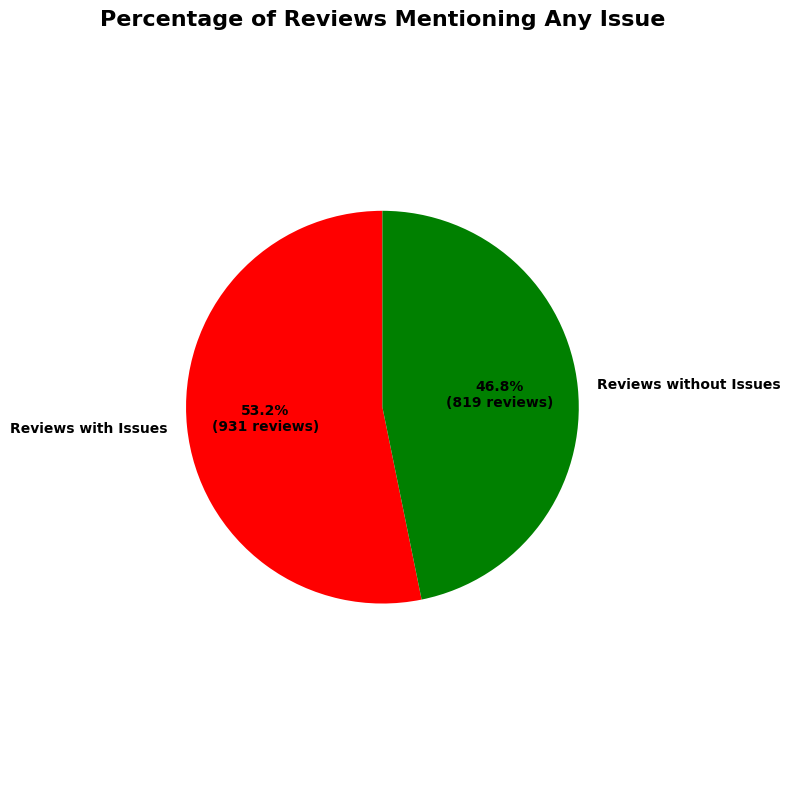

Review Complaint Status Counts:


,count
has_complaint,
Reviews with Issues,931
Reviews without Issues,819


In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Determine which reviews have complaints and which don't
df['has_complaint'] = df['complaints'].apply(lambda x: len(x) > 0)

# Count reviews with and without complaints
complaint_status_counts = df['has_complaint'].value_counts().rename(index={True: 'Reviews with Issues', False: 'Reviews without Issues'})

# Prepare data for plotting
labels = complaint_status_counts.index
sizes = complaint_status_counts.values

# Define 'amazing' colors (now red and green)
colors = ['red', 'green'] # Red for issues, Green for no issues

# Custom autopct function to show both percentage and absolute count
def autopct_format_func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute} reviews)"

# Create a full pie chart (not a donut chart)
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(sizes, labels=labels,
       autopct=lambda pct: autopct_format_func(pct, sizes), # Use custom function
       startangle=90, colors=colors,
       textprops={'fontsize': 10, 'color': 'black', 'fontweight': 'bold'}) # Reduced fontsize here

# Remove the circle from the center to make it a full pie chart
# centre_circle = plt.Circle((0,0), 0.70, fc='white')
# fig.gca().add_artist(centre_circle)

ax.set_title('Percentage of Reviews Mentioning Any Issue', fontsize=16, fontweight='bold')
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

print("Review Complaint Status Counts:")
display(complaint_status_counts)

In [113]:
df.head(5)

,Page,Review_ID,Author_Name,Rating_Stars,Review_Title,Review_Text,City,Posted_Date,Helpful_Count,Certified_Buyer,Converted_Date,Sentiment,Misspelled_Title_Words,Misspelled_Text_Words,Cleaned_Review_Title,Cleaned_Review_Text,Tokenized_Review_Title,Tokenized_Review_Text,review_length,length_category,dominant_topic,aspects,complaints,has_complaint
0,1,P1_REV_007,Swayam Vish,4.0,Pretty good,Good compact phone and having good camera but facing issu in battery because it's 4000 mah and it's not lasting for whole day. I have to carry power bank.I am sharing sample of photos.. it's light balance is very good.,Sehore District,1 month ago,37,Yes,2025-10-27 04:25:15.123540,2,[],[issu],pretty good,good compact phone good camera facing issue battery mah not lasting whole day carry power bank sharing sample photo light balance good,"[pretty, good]","[good, compact, phone, good, camera, facing, issue, battery, mah, not, lasting, whole, day, carry, power, bank, sharing, sample, photo, light, balance, good]",218,long,1,"[camera, battery, heating]","[heating, camera, battery, design]",True
1,1,P1_REV_010,Amit Kumar Behera,5.0,Mind-blowing purchase,"Powerful performance, excellent display,compact size and amazing camera making it an allrounder phone. The only drawback is battery life.",Bhubaneswar,1 month ago,34,Yes,2025-10-27 04:25:15.123601,2,[],[],mind blowing purchase,powerful performance excellent display compact size amazing camera making allrounder phone drawback battery life,"[mind, blowing, purchase]","[powerful, performance, excellent, display, compact, size, amazing, camera, making, allrounder, phone, drawback, battery, life]",137,medium,8,"[camera, battery, performance, display]","[camera, battery, performance, display, design]",True
2,1,P1_REV_009,Arnab Deb,5.0,Awesome,Today received this phone. It's just outstanding. Battery is good. I m not facing any kind of Heating issue. Camera is far better than I phone. Just shared a photo of my friend in low light.,Dinhata,1 month ago,10,Yes,2025-10-27 04:25:15.123616,2,[],[],awesome,today received phone outstanding battery good not facing kind heating issue camera far better phone shared photo friend low light,[awesome],"[today, received, phone, outstanding, battery, good, not, facing, kind, heating, issue, camera, far, better, phone, shared, photo, friend, low, light]",191,medium,9,"[camera, battery, heating]","[heating, camera, battery, delivery]",True
3,1,P1_REV_008,Jayasuriya Anbu,4.0,Good quality product,"After using S24 for 4 days am writing this review overall a good compact and a handy phone if you want a beast camera, clean UI, battery backup is slightly less but it's okay for average use if you want a mobile for daily gaming than the battery backup will be lesser.If you want good handy Samsung phone than go for it🙌",Mumbai,1 month ago,127,Yes,2025-10-27 04:25:15.123620,2,[],[],good quality product,using day writing review overall good compact handy phone want beast camera clean battery backup slightly less okay average use want mobile daily gaming battery backup lesser want good handy samsung phone,"[good, quality, product]","[using, day, writing, review, overall, good, compact, handy, phone, want, beast, camera, clean, battery, backup, slightly, less, okay, average, use, want, mobile, daily, gaming, battery, backup, lesser, want, good, handy, samsung, phone]",320,long,5,"[camera, battery]","[camera, battery, design]",True
4,1,P1_REV_013,Abhishek Maurya,5.0,Wonderful,Everything is just excellent but only battery is average,Jaunpur,1 month ago,8,Yes,2025-10-27 04:25:15.123625,2,[],[],wonderful,everything excellent battery average,[wonderful],"[everything, excellent, battery, average]",56,medium,2,[battery],[battery],True


# Task
Save the modified DataFrame to '/content/drive/MyDrive/nolan_edutech_assignement/MODIFIED_SamsungS24_Flipkart_R177_D241125_KrishnSingh_fetched.csv' and confirm its successful saving.

## Save Modified DataFrame

### Subtask:
Save the current state of the DataFrame `df` to a new CSV file named 'MODIFIED_SamsungS24_Flipkart_R177_D241125_KrishnSingh_fetched.csv' in the '/content/drive/MyDrive/nolan_edutech_assignement/' folder. This will include all the new columns and cleaning steps performed so far.


**Reasoning**:
Define the output file path and save the DataFrame `df` to a CSV file, excluding the index, to preserve all cleaning steps and new columns.



In [114]:
output_file_path = '/content/drive/MyDrive/nolan_edutech_assignement/MODIFIED_SamsungS24_Flipkart_R177_D241125_KrishnSingh_fetched.csv'
df.to_csv(output_file_path, index=False)

print(f"DataFrame successfully saved to: {output_file_path}")

DataFrame successfully saved to: /content/drive/MyDrive/nolan_edutech_assignement/MODIFIED_SamsungS24_Flipkart_R177_D241125_KrishnSingh_fetched.csv


## Summary:

### Data Analysis Key Findings
*   The modified DataFrame was successfully saved to `/content/drive/MyDrive/nolan_edutech_assignement/MODIFIED_SamsungS24_Flipkart_R177_D241125_KrishnSingh_fetched.csv`.
*   The `index=False` argument was used during saving, ensuring that the DataFrame index was not included in the CSV file.

### Insights or Next Steps
*   The successfully saved DataFrame, incorporating all cleaning steps and new columns, is now prepared for any subsequent analysis or reporting tasks.


# Task
Save the fitted `tfidf_title` and `tfidf_text` vectorizer objects to the Google Drive folder "/content/drive/MyDrive/nolan_edutech_assignement/" using `joblib`.

## Save Fitted TF-IDF Vectorizers

### Subtask:
Save the fitted `tfidf_title` and `tfidf_text` vectorizer objects using `joblib` to the Google Drive folder.


**Reasoning**:
To save the fitted TF-IDF vectorizer objects, I need to import the `joblib` library and then use `joblib.dump()` to save each vectorizer to its specified path in Google Drive, followed by a confirmation message.



In [115]:
import joblib

# Define paths for saving
tfidf_title_path = '/content/drive/MyDrive/nolan_edutech_assignement/tfidf_title.joblib'
tfidf_text_path = '/content/drive/MyDrive/nolan_edutech_assignement/tfidf_text.joblib'

# Save tfidf_title vectorizer
joblib.dump(tfidf_title, tfidf_title_path)

# Save tfidf_text vectorizer
joblib.dump(tfidf_text, tfidf_text_path)

print(f"tfidf_title vectorizer successfully saved to: {tfidf_title_path}")
print(f"tfidf_text vectorizer successfully saved to: {tfidf_text_path}")

tfidf_title vectorizer successfully saved to: /content/drive/MyDrive/nolan_edutech_assignement/tfidf_title.joblib
tfidf_text vectorizer successfully saved to: /content/drive/MyDrive/nolan_edutech_assignement/tfidf_text.joblib
